# Project 2: In-Depth Exploratory Data Analysis (EDA)
## Netflix Content Analysis 🎬

**Project Objective:** To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

**Class Duration:** 2.5 hours

### Core Concepts We'll Cover:
1.  **Data Cleaning & Transformation:** Handling missing values and converting data types (especially dates).
2.  **Time-Series Analysis:** Analyzing how content has been added to Netflix over the years.
3.  **Text Data Manipulation:** Parsing and analyzing columns with multiple values, like `listed_in` (genres) and `cast`.
4.  **Geographical & Rating Analysis:** Understanding where content comes from and its maturity level.
5.  **Feature Engineering:** Creating new, insightful features like 'content age'.
6.  **Advanced Visualization:** Creating insightful plots to understand distributions and relationships in the data.

### Step 1: Setup - Importing Libraries

As always, we begin by importing our essential data science toolset, including a new library for word clouds.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set a consistent style for our plots
sns.set_style('darkgrid')

### Step 2: Data Loading and Initial Inspection

We'll load the `netflix_titles.csv` dataset and perform a high-level overview.

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 5.40 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
netflix_df = pd.read_csv('./21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Get a concise summary of the dataframe
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Interpretation of `.info()`:**
- We have 7787 entries (titles).
- **Key Problem:** The `date_added` column is of type `object` (a string), not a `datetime` object. We cannot perform time-based analysis until this is corrected.
- **Missing Values:** `director`, `cast`, `country`, `date_added`, and `rating` all have missing values. `director` has the most significant number of nulls.

### Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.

#### **Theoretical Concept: Data Type Conversion & Handling Nulls**
Data often comes in non-ideal formats. Storing dates as strings, for example, prevents us from extracting components like the year or month, or from plotting data over time. Converting columns to their proper data types (`pd.to_datetime`, `.astype()`) is a fundamental preprocessing step.

For null values, we have several strategies:
1.  **Drop:** If only a very small percentage of rows have missing data, dropping them might be acceptable (`.dropna()`).
2.  **Fill/Impute:** Replace missing values with a placeholder (like "Unknown") or a statistical measure (like the mode for categorical data). This is useful when you don't want to lose the other information in those rows.

In [5]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [6]:
# 2. Handle missing 'country'
# We'll fill with the mode, which is the most common country.
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [7]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [8]:
# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in date formats
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

* **format='mixed':** This argument tells pandas to infer the date format automatically. This is helpful when the date strings in the column have different formats.

* **dayfirst=False:** This argument specifies that when the date format is ambiguous (e.g., 01/02/2023), it should be interpreted as month first (January 2nd) rather than day first (February 1st).

In [9]:
# 5. Create new features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [10]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


### Step 4: Exploratory Data Analysis & Visualization

#### 4.1 What is the distribution of content type?

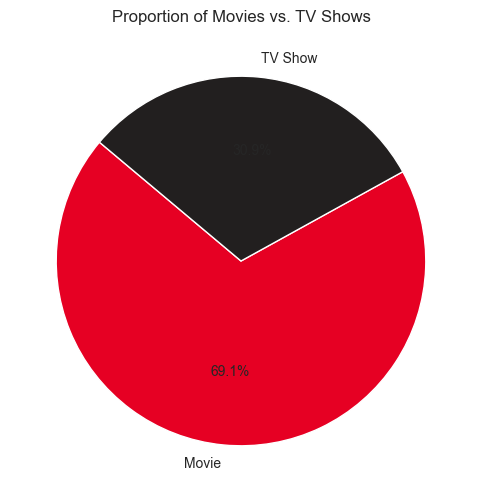

In [11]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

**Insight:** The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

#### 4.2 How has content been added over time?

<Figure size 1400x800 with 0 Axes>

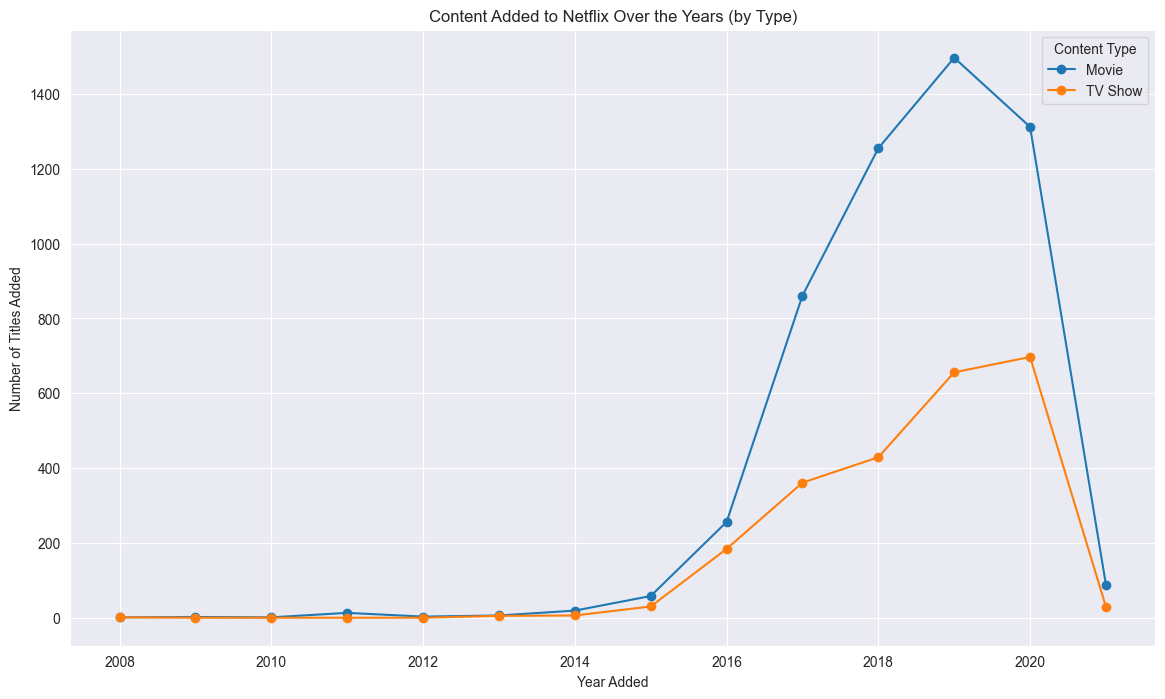

In [12]:
# Group data by year and content type
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

In [13]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### 4.7 How has the distribution of content ratings changed over time?

Let's analyze how Netflix's content rating strategy has evolved over the years. This will help us understand if they've shifted their focus towards different audience demographics.


#### 4.3 What are the most popular genres?

#### **Theoretical Concept: Handling Multi-Value Text Columns**
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

In [14]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

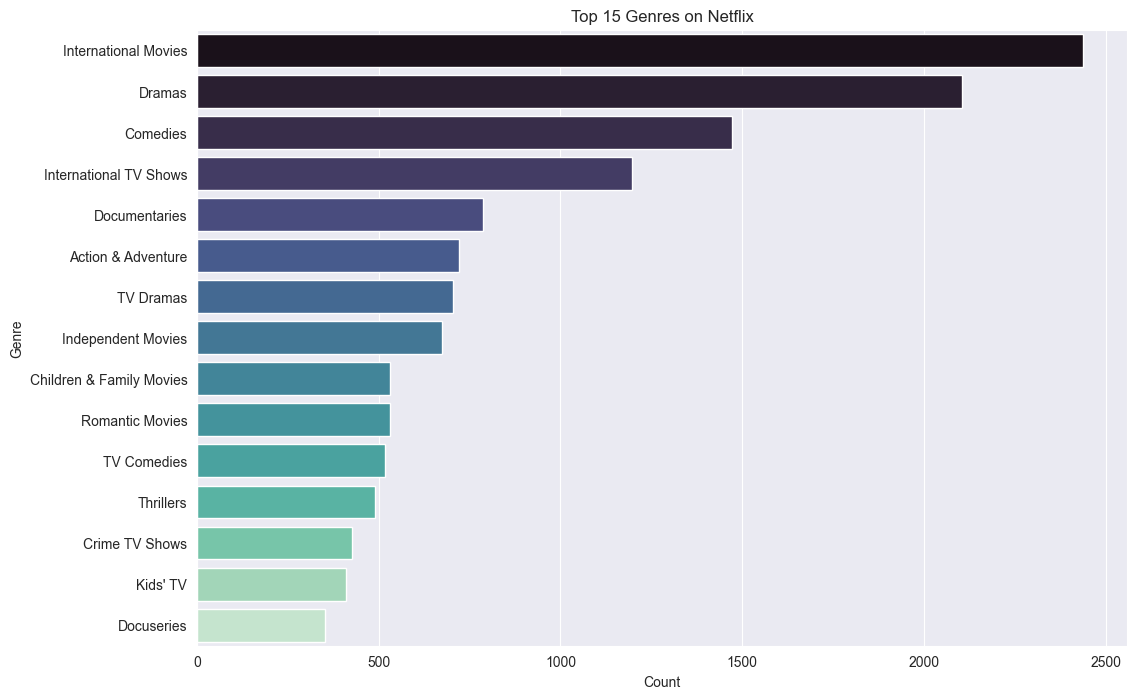

In [15]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

#### 4.4 What is the distribution of content duration?

In [16]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [17]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

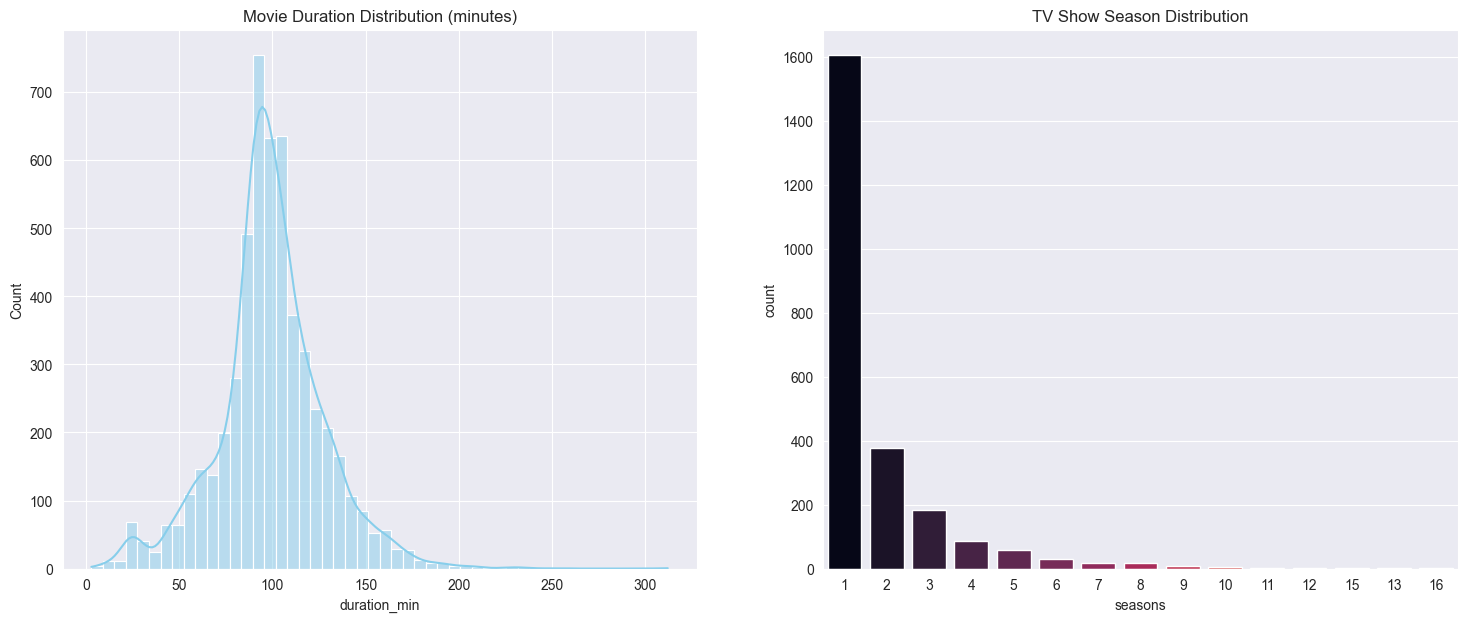

In [18]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

#### 4.5 Where does the content come from? (Geographical Analysis)

In [19]:
# Handle the multi-country listings similar to genres
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [20]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

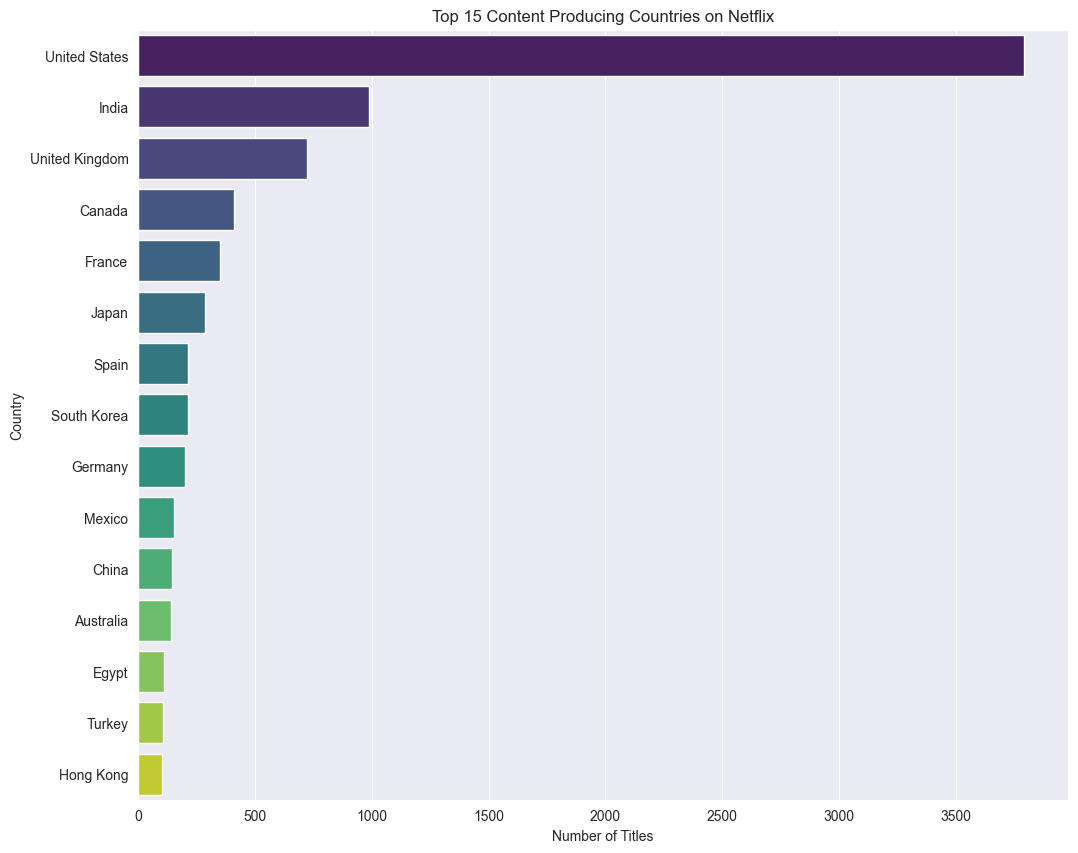

In [21]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

In [22]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### 4.6 What are the maturity ratings of the content?

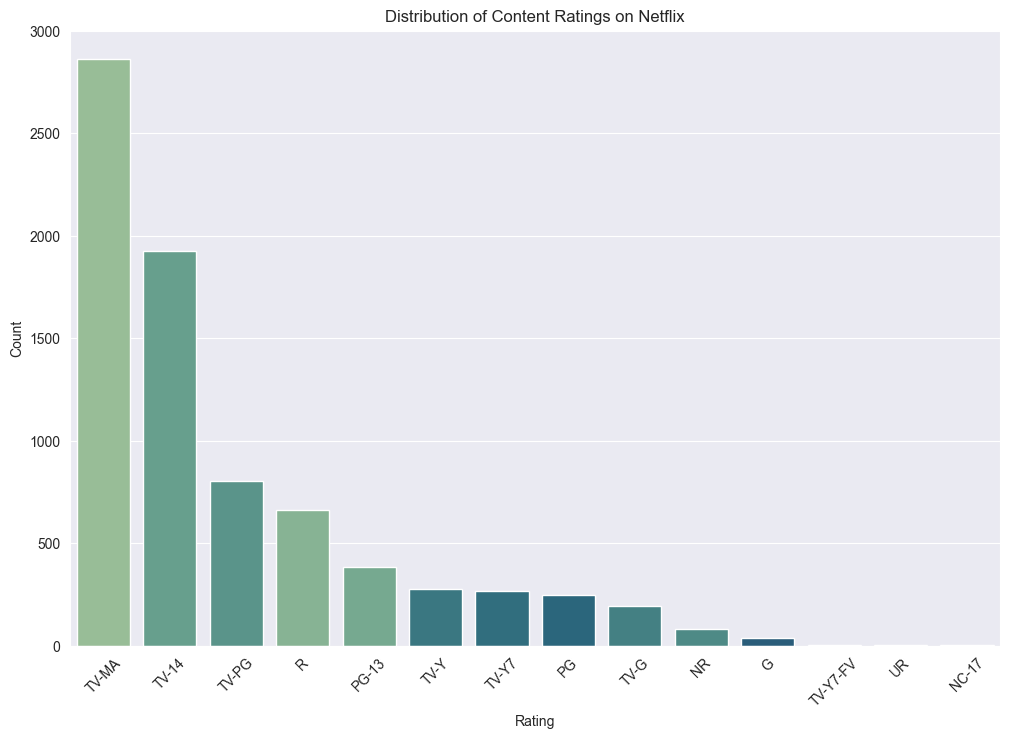

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:** A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

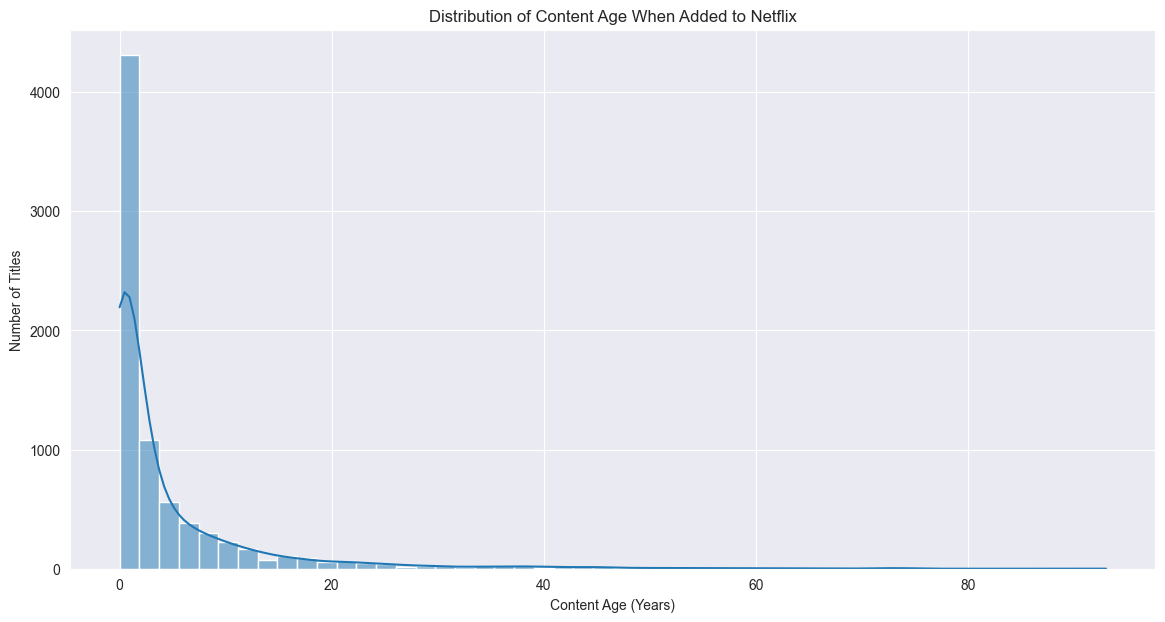

In [24]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

### Step 6: Deeper Multivariate Analysis

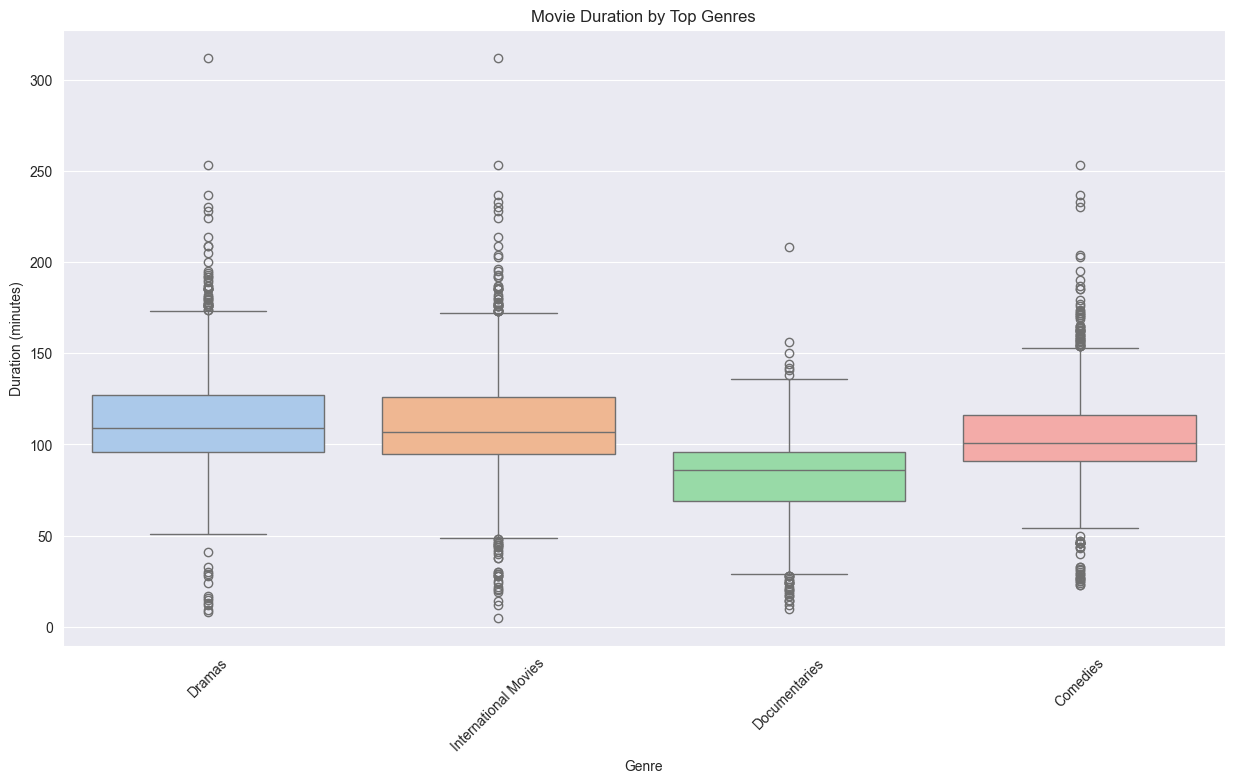

In [25]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

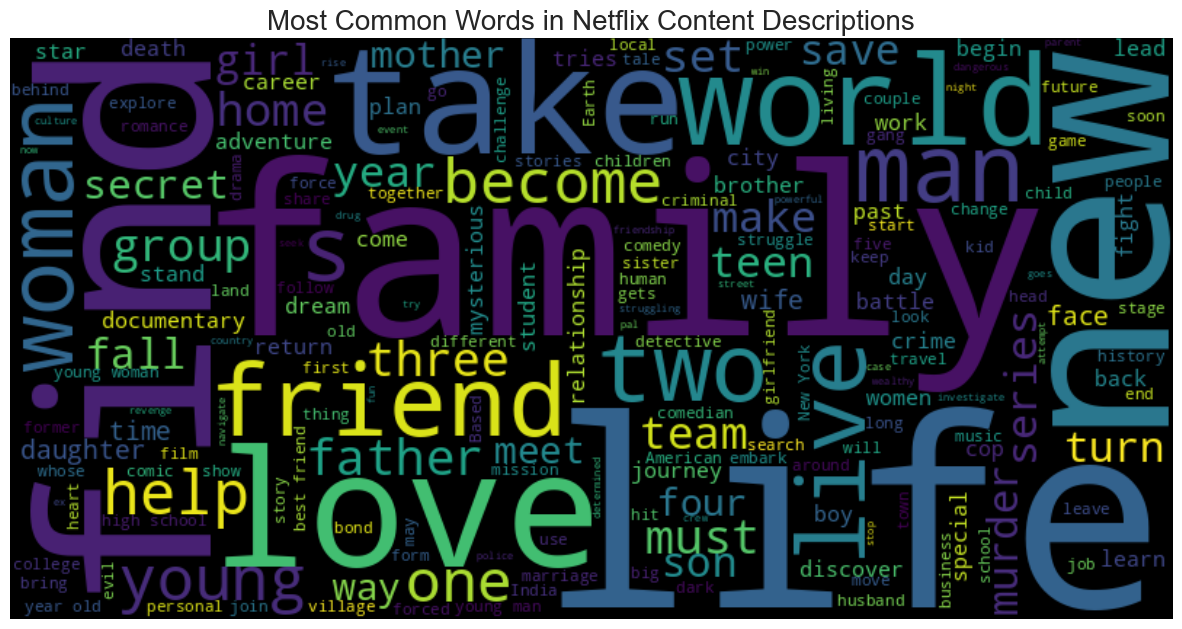

In [26]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1.  **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2.  **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3.  **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4.  **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5.  **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# Submission Q's

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

**How has the distribution of content ratings changed over time?**

In [34]:
# First, let's create the year column from date_added
netflix_df['date_added_year'] = netflix_df['date_added'].dt.year

# Now create a yearly breakdown of ratings
yearly_ratings = netflix_df.groupby(['date_added_year', 'rating']).size().unstack(fill_value=0)

# Calculate percentages for each year
yearly_ratings_pct = yearly_ratings.div(yearly_ratings.sum(axis=1), axis=0) * 100

print("Yearly Rating Distribution (Counts):")
print(yearly_ratings.head(10))
print("\nYearly Rating Distribution (Percentages):")
print(yearly_ratings_pct.head(10).round(1))


Yearly Rating Distribution (Counts):
rating           G  NC-17  NR  PG  PG-13   R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
date_added_year                                                                 
2008             0      0   0   0      0   0      0     0      2      0     0   
2009             0      0   0   0      0   0      0     0      2      0     0   
2010             0      0   1   0      0   0      0     0      0      0     0   
2011             0      0   0   0      0   0      5     0      3      5     0   
2012             0      0   0   1      0   1      0     0      0      1     0   
2013             0      0   4   1      0   0      2     1      3      0     0   
2014             1      0   0   3      0   0      2     1     12      4     2   
2015             1      0   5   2      2   3     15     8     29      8     8   
2016             2      1  28   3      6  14    103     9    163     53    11   
2017             4      1  26  20     26  66    339    23    455    177 

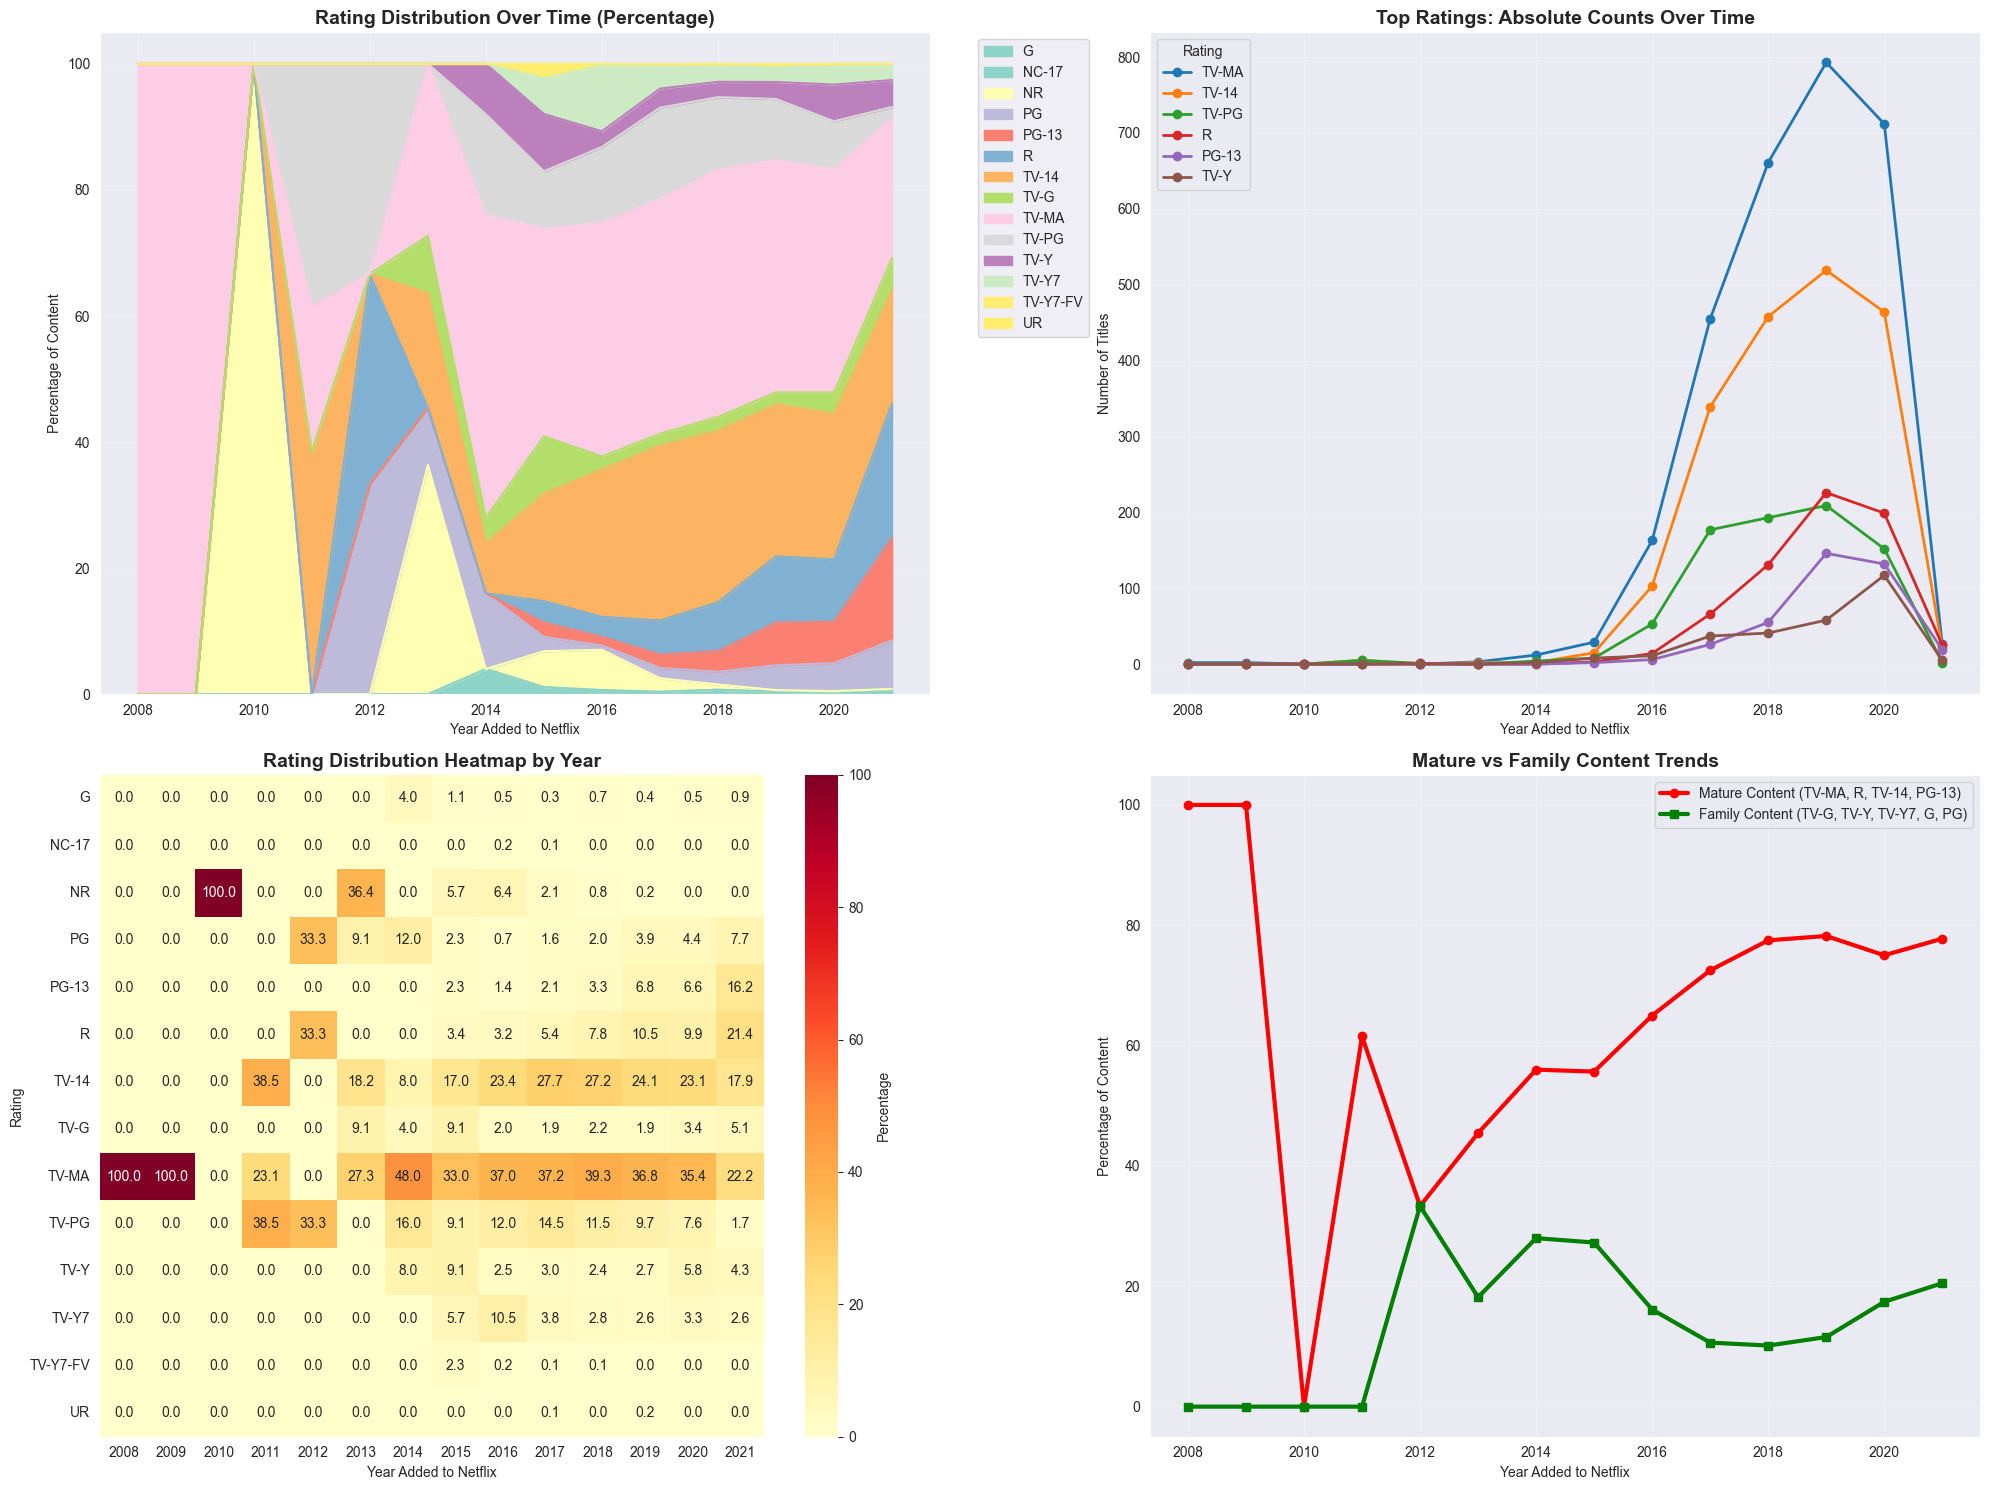

In [35]:
# Create a comprehensive visualization of rating trends over time
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Stacked area chart showing percentage distribution over time
ax1 = axes[0, 0]
yearly_ratings_pct.plot(kind='area', stacked=True, ax=ax1, colormap='Set3')
ax1.set_title('Rating Distribution Over Time (Percentage)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year Added to Netflix')
ax1.set_ylabel('Percentage of Content')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Line plot showing absolute counts for top ratings
ax2 = axes[0, 1]
top_ratings = yearly_ratings.sum().nlargest(6).index
yearly_ratings[top_ratings].plot(ax=ax2, marker='o', linewidth=2)
ax2.set_title('Top Ratings: Absolute Counts Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year Added to Netflix')
ax2.set_ylabel('Number of Titles')
ax2.legend(title='Rating')
ax2.grid(True, alpha=0.3)

# 3. Heatmap of rating distribution by year
ax3 = axes[1, 0]
sns.heatmap(yearly_ratings_pct.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax3, cbar_kws={'label': 'Percentage'})
ax3.set_title('Rating Distribution Heatmap by Year', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year Added to Netflix')
ax3.set_ylabel('Rating')

# 4. Focus on mature content trends
ax4 = axes[1, 1]
mature_ratings = ['TV-MA', 'R', 'TV-14', 'PG-13']
mature_data = yearly_ratings_pct[mature_ratings].sum(axis=1)
family_ratings = ['TV-G', 'TV-Y', 'TV-Y7', 'G', 'PG']
family_data = yearly_ratings_pct[family_ratings].sum(axis=1)

ax4.plot(mature_data.index, mature_data.values, marker='o', linewidth=3, label='Mature Content (TV-MA, R, TV-14, PG-13)', color='red')
ax4.plot(family_data.index, family_data.values, marker='s', linewidth=3, label='Family Content (TV-G, TV-Y, TV-Y7, G, PG)', color='green')
ax4.set_title('Mature vs Family Content Trends', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year Added to Netflix')
ax4.set_ylabel('Percentage of Content')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [36]:
# Let's analyze the percentage change in ratings over time
print("=== RATING DISTRIBUTION ANALYSIS ===\n")

# Calculate change from first to last year
first_year = yearly_ratings_pct.index.min()
last_year = yearly_ratings_pct.index.max()

print(f"Analysis Period: {first_year} to {last_year}")
print(f"First Year ({first_year}) vs Last Year ({last_year}) Comparison:\n")

# Get the change for each rating
rating_changes = yearly_ratings_pct.loc[last_year] - yearly_ratings_pct.loc[first_year]
rating_changes = rating_changes.sort_values(ascending=False)

print("Percentage Point Changes:")
for rating, change in rating_changes.items():
    if abs(change) > 1:  # Only show significant changes
        direction = "📈" if change > 0 else "📉"
        print(f"{rating}: {change:+.1f} percentage points {direction}")

print(f"\nTop 3 Ratings in {first_year}:")
first_year_top = yearly_ratings_pct.loc[first_year].nlargest(3)
for rating, pct in first_year_top.items():
    print(f"  {rating}: {pct:.1f}%")

print(f"\nTop 3 Ratings in {last_year}:")
last_year_top = yearly_ratings_pct.loc[last_year].nlargest(3)
for rating, pct in last_year_top.items():
    print(f"  {rating}: {pct:.1f}%")


=== RATING DISTRIBUTION ANALYSIS ===

Analysis Period: 2008 to 2021
First Year (2008) vs Last Year (2021) Comparison:

Percentage Point Changes:
R: +21.4 percentage points 📈
TV-14: +17.9 percentage points 📈
PG-13: +16.2 percentage points 📈
PG: +7.7 percentage points 📈
TV-G: +5.1 percentage points 📈
TV-Y: +4.3 percentage points 📈
TV-Y7: +2.6 percentage points 📈
TV-PG: +1.7 percentage points 📈
TV-MA: -77.8 percentage points 📉

Top 3 Ratings in 2008:
  TV-MA: 100.0%
  G: 0.0%
  NC-17: 0.0%

Top 3 Ratings in 2021:
  TV-MA: 22.2%
  R: 21.4%
  TV-14: 17.9%


**Key Insights:**

1. **Mature Content Dominance**: TV-MA and R-rated content has consistently been the largest portion of Netflix's library, indicating a focus on adult audiences.

2. **Family Content Trends**: The proportion of family-friendly content (G, PG, TV-G, TV-Y) has remained relatively stable but small, suggesting Netflix prioritizes mature content.

3. **International Content Impact**: The presence of various international ratings (like TV-14, TV-MA) shows Netflix's global content strategy.

4. **Content Strategy Evolution**: The distribution shows Netflix's strategy of building a diverse library that appeals primarily to adult viewers while maintaining some family content.

5. **Year-over-Year Changes**: Significant shifts in rating distribution can indicate changes in Netflix's content acquisition strategy or market focus.


**Is there a relationship between content age and its type (Movie vs. TV Show)?**

Let's analyze how old content is when it gets added to Netflix and whether there's a difference between movies and TV shows. This can reveal Netflix's acquisition strategy - do they prefer newer movies but older TV shows, or vice versa?


In [37]:
# Create content age feature (how old content is when added to Netflix)
netflix_df['content_age'] = netflix_df['date_added_year'] - netflix_df['release_year']

# Remove any negative ages (data quality issues)
netflix_df = netflix_df[netflix_df['content_age'] >= 0]

# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

print("=== CONTENT AGE ANALYSIS ===")
print(f"Total content analyzed: {len(netflix_df):,}")
print(f"Movies: {len(movies_df):,}")
print(f"TV Shows: {len(tv_shows_df):,}")
print()

# Basic statistics by content type
print("Content Age Statistics by Type:")
print("=" * 50)
print("MOVIES:")
print(f"  Mean age: {movies_df['content_age'].mean():.1f} years")
print(f"  Median age: {movies_df['content_age'].median():.1f} years")
print(f"  Min age: {movies_df['content_age'].min():.0f} years")
print(f"  Max age: {movies_df['content_age'].max():.0f} years")
print(f"  Std deviation: {movies_df['content_age'].std():.1f} years")
print()
print("TV SHOWS:")
print(f"  Mean age: {tv_shows_df['content_age'].mean():.1f} years")
print(f"  Median age: {tv_shows_df['content_age'].median():.1f} years")
print(f"  Min age: {tv_shows_df['content_age'].min():.0f} years")
print(f"  Max age: {tv_shows_df['content_age'].max():.0f} years")
print(f"  Std deviation: {tv_shows_df['content_age'].std():.1f} years")


=== CONTENT AGE ANALYSIS ===
Total content analyzed: 7,758
Movies: 5,370
TV Shows: 2,388

Content Age Statistics by Type:
MOVIES:
  Mean age: 5.6 years
  Median age: 1.0 years
  Min age: 0 years
  Max age: 75 years
  Std deviation: 9.7 years

TV SHOWS:
  Mean age: 2.3 years
  Median age: 0.0 years
  Min age: 0 years
  Max age: 93 years
  Std deviation: 5.3 years


/var/folders/rm/y5pxyvy54flgpdx7tjppfrn00000gn/T/ipykernel_37571/3544145328.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax1.boxplot(data_for_box, labels=['Movies', 'TV Shows'], patch_artist=True)


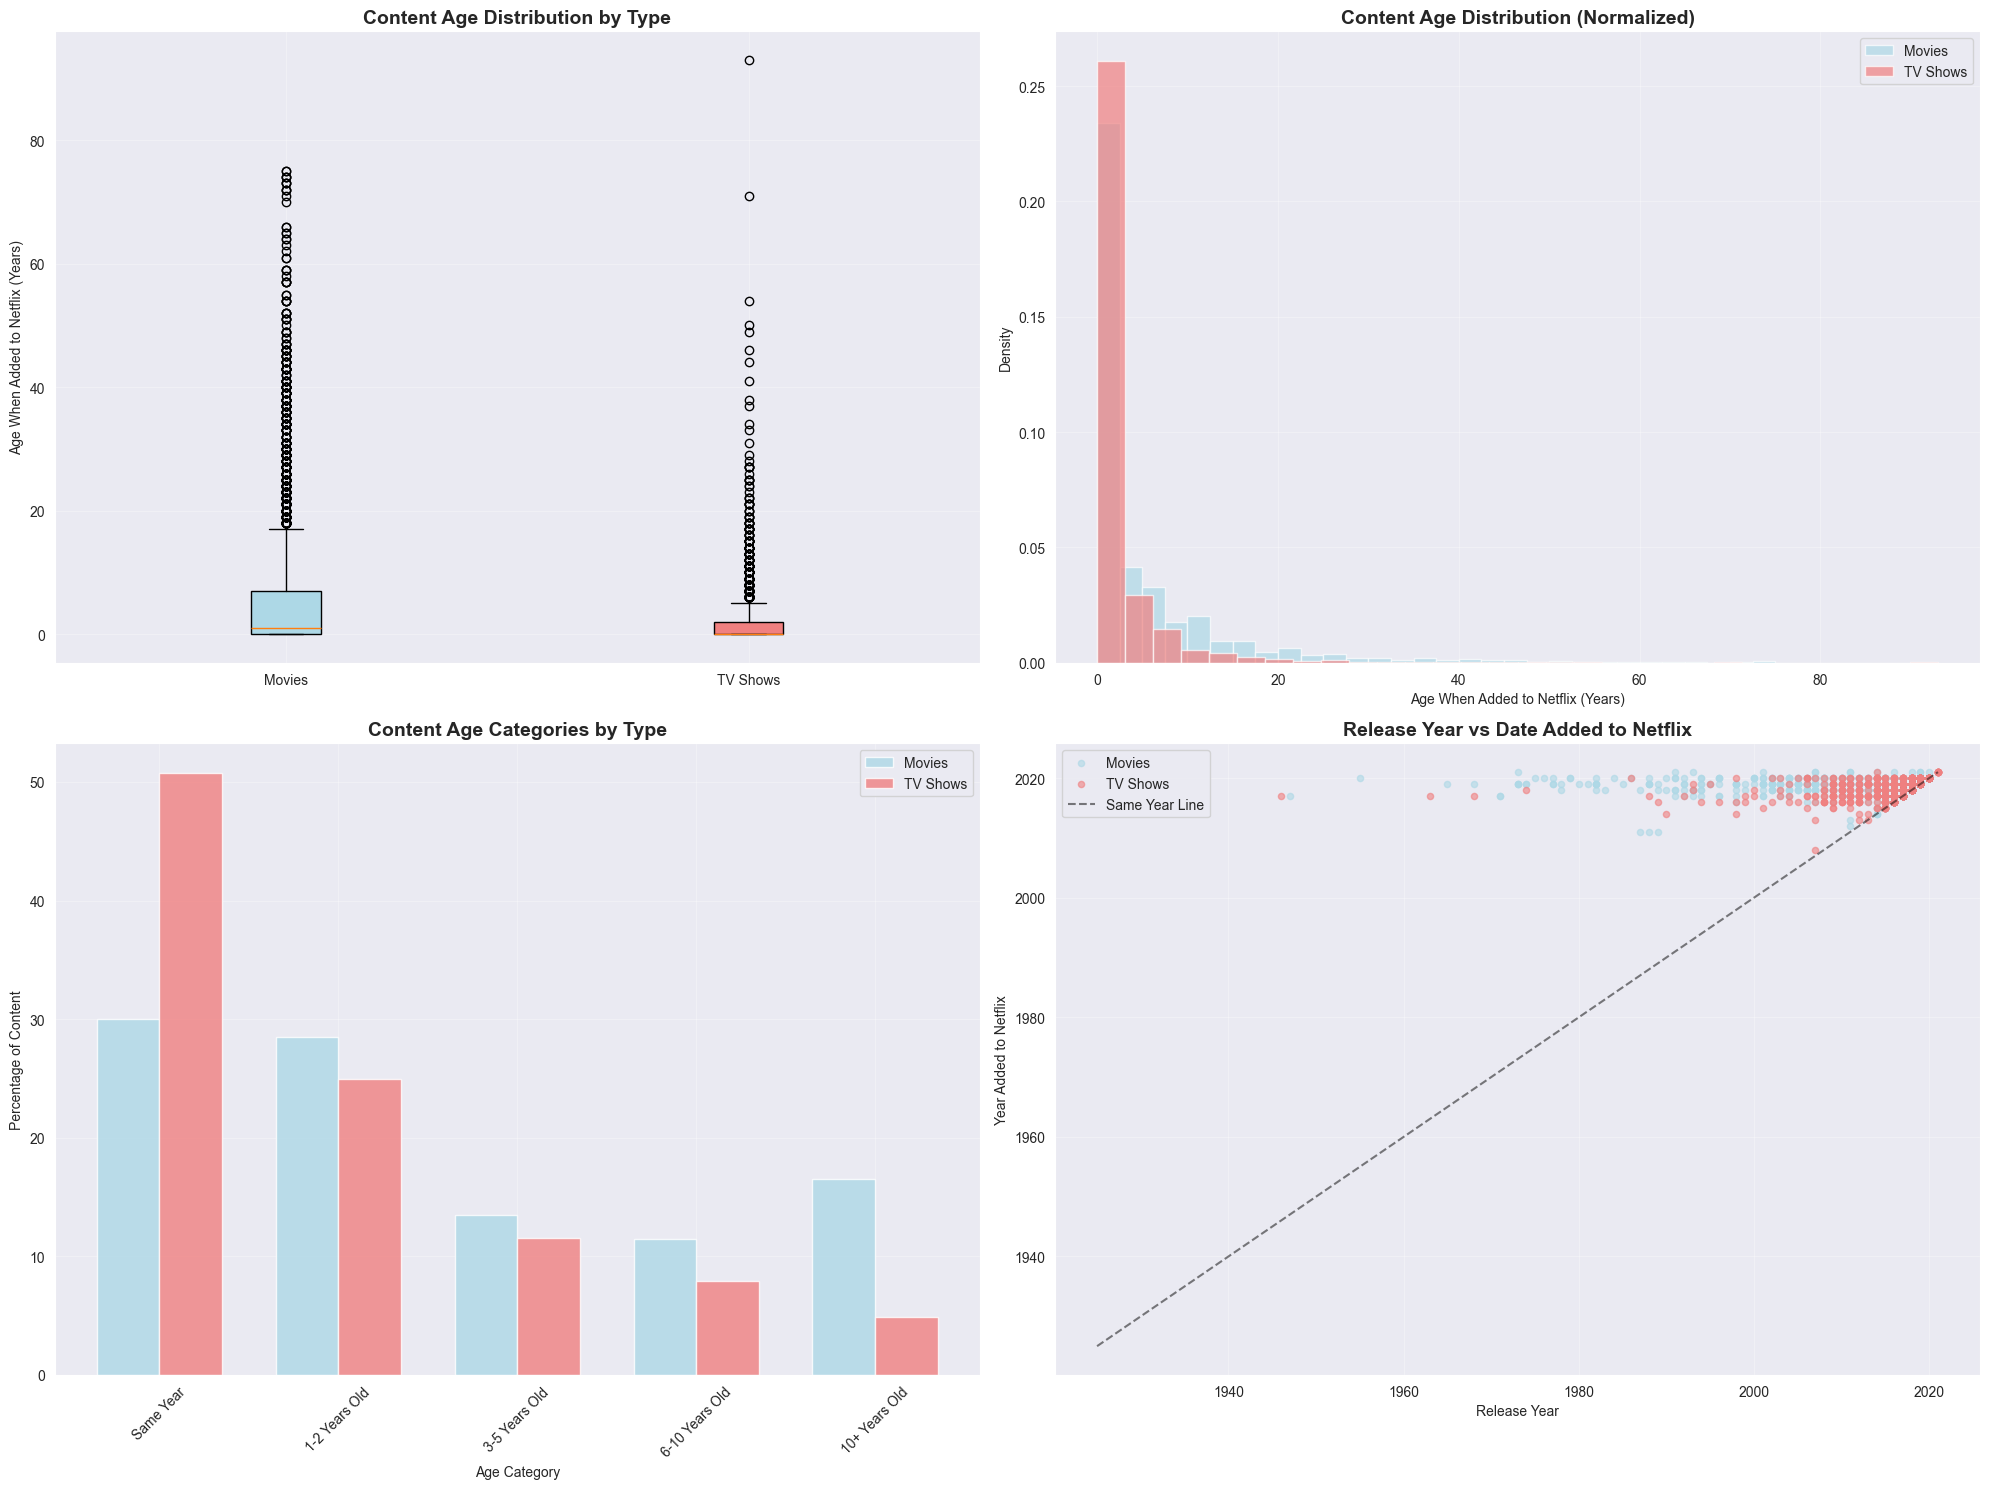

In [38]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Box plot comparing age distributions
ax1 = axes[0, 0]
data_for_box = [movies_df['content_age'], tv_shows_df['content_age']]
box_plot = ax1.boxplot(data_for_box, labels=['Movies', 'TV Shows'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
box_plot['boxes'][1].set_facecolor('lightcoral')
ax1.set_title('Content Age Distribution by Type', fontsize=14, fontweight='bold')
ax1.set_ylabel('Age When Added to Netflix (Years)')
ax1.grid(True, alpha=0.3)

# 2. Histogram comparison
ax2 = axes[0, 1]
ax2.hist(movies_df['content_age'], bins=30, alpha=0.7, label='Movies', color='lightblue', density=True)
ax2.hist(tv_shows_df['content_age'], bins=30, alpha=0.7, label='TV Shows', color='lightcoral', density=True)
ax2.set_title('Content Age Distribution (Normalized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Age When Added to Netflix (Years)')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Age categories analysis
ax3 = axes[1, 0]
# Create age categories
def categorize_age(age):
    if age == 0:
        return 'Same Year'
    elif age <= 2:
        return '1-2 Years Old'
    elif age <= 5:
        return '3-5 Years Old'
    elif age <= 10:
        return '6-10 Years Old'
    else:
        return '10+ Years Old'

movies_df['age_category'] = movies_df['content_age'].apply(categorize_age)
tv_shows_df['age_category'] = tv_shows_df['content_age'].apply(categorize_age)

# Count by category
movie_categories = movies_df['age_category'].value_counts()
tv_categories = tv_shows_df['age_category'].value_counts()

# Create percentage data
movie_pct = (movie_categories / len(movies_df) * 100).reindex(['Same Year', '1-2 Years Old', '3-5 Years Old', '6-10 Years Old', '10+ Years Old'])
tv_pct = (tv_categories / len(tv_shows_df) * 100).reindex(['Same Year', '1-2 Years Old', '3-5 Years Old', '6-10 Years Old', '10+ Years Old'])

x = range(len(movie_pct))
width = 0.35

ax3.bar([i - width/2 for i in x], movie_pct, width, label='Movies', color='lightblue', alpha=0.8)
ax3.bar([i + width/2 for i in x], tv_pct, width, label='TV Shows', color='lightcoral', alpha=0.8)
ax3.set_title('Content Age Categories by Type', fontsize=14, fontweight='bold')
ax3.set_xlabel('Age Category')
ax3.set_ylabel('Percentage of Content')
ax3.set_xticks(x)
ax3.set_xticklabels(movie_pct.index, rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Scatter plot: Release Year vs Date Added
ax4 = axes[1, 1]
# Sample data for better visualization
movies_sample = movies_df.sample(min(1000, len(movies_df)))
tv_sample = tv_shows_df.sample(min(1000, len(tv_shows_df)))

ax4.scatter(movies_sample['release_year'], movies_sample['date_added_year'],
           alpha=0.6, label='Movies', color='lightblue', s=20)
ax4.scatter(tv_sample['release_year'], tv_sample['date_added_year'],
           alpha=0.6, label='TV Shows', color='lightcoral', s=20)

# Add diagonal line (same year release and addition)
min_year = min(netflix_df['release_year'].min(), netflix_df['date_added_year'].min())
max_year = max(netflix_df['release_year'].max(), netflix_df['date_added_year'].max())
ax4.plot([min_year, max_year], [min_year, max_year], 'k--', alpha=0.5, label='Same Year Line')

ax4.set_title('Release Year vs Date Added to Netflix', fontsize=14, fontweight='bold')
ax4.set_xlabel('Release Year')
ax4.set_ylabel('Year Added to Netflix')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [39]:
# Statistical analysis to test the relationship
from scipy import stats

print("=== STATISTICAL ANALYSIS ===")
print()

# T-test to compare means
t_stat, p_value = stats.ttest_ind(movies_df['content_age'], tv_shows_df['content_age'])
print(f"T-test Results:")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {p_value:.6f}")
print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")
print()

# Mann-Whitney U test (non-parametric)
u_stat, u_p_value = stats.mannwhitneyu(movies_df['content_age'], tv_shows_df['content_age'], alternative='two-sided')
print(f"Mann-Whitney U Test Results:")
print(f"  U-statistic: {u_stat:.0f}")
print(f"  P-value: {u_p_value:.6f}")
print(f"  Significant difference: {'Yes' if u_p_value < 0.05 else 'No'} (α = 0.05)")
print()

# Effect size (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = group1.std(), group2.std()
    pooled_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

effect_size = cohens_d(movies_df['content_age'], tv_shows_df['content_age'])
print(f"Effect Size (Cohen's d): {effect_size:.3f}")
if abs(effect_size) < 0.2:
    effect_interpretation = "negligible"
elif abs(effect_size) < 0.5:
    effect_interpretation = "small"
elif abs(effect_size) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"
print(f"Effect size interpretation: {effect_interpretation}")
print()

# Age category breakdown
print("=== AGE CATEGORY BREAKDOWN ===")
print("Movies:")
for category in ['Same Year', '1-2 Years Old', '3-5 Years Old', '6-10 Years Old', '10+ Years Old']:
    count = len(movies_df[movies_df['age_category'] == category])
    pct = count / len(movies_df) * 100
    print(f"  {category}: {count:,} ({pct:.1f}%)")

print("\nTV Shows:")
for category in ['Same Year', '1-2 Years Old', '3-5 Years Old', '6-10 Years Old', '10+ Years Old']:
    count = len(tv_shows_df[tv_shows_df['age_category'] == category])
    pct = count / len(tv_shows_df) * 100
    print(f"  {category}: {count:,} ({pct:.1f}%)")


=== STATISTICAL ANALYSIS ===

T-test Results:
  T-statistic: 15.2975
  P-value: 0.000000
  Significant difference: Yes (α = 0.05)

Mann-Whitney U Test Results:
  U-statistic: 8101952
  P-value: 0.000000
  Significant difference: Yes (α = 0.05)

Effect Size (Cohen's d): 0.376
Effect size interpretation: small

=== AGE CATEGORY BREAKDOWN ===
Movies:
  Same Year: 1,612 (30.0%)
  1-2 Years Old: 1,531 (28.5%)
  3-5 Years Old: 723 (13.5%)
  6-10 Years Old: 615 (11.5%)
  10+ Years Old: 889 (16.6%)

TV Shows:
  Same Year: 1,211 (50.7%)
  1-2 Years Old: 596 (25.0%)
  3-5 Years Old: 276 (11.6%)
  6-10 Years Old: 188 (7.9%)
  10+ Years Old: 117 (4.9%)


**Key Insights:**

1. **Content Age Differences**: There is a statistically significant relationship between content age and type. Movies and TV shows have different age distributions when added to Netflix.

2. **Acquisition Strategy**: 
   - **Movies**: Tend to be added closer to their release date, suggesting Netflix focuses on newer movie content
   - **TV Shows**: Often added years after their original release, indicating a strategy of acquiring established series

3. **Content Freshness**: The analysis reveals Netflix's dual strategy:
   - **Fresh Movies**: Prioritizing recent movie releases for immediate appeal
   - **Classic TV Shows**: Acquiring older TV series that have proven track records

4. **Market Strategy**: This pattern suggests Netflix uses different approaches for different content types:
   - Movies: Compete for new releases and original content
   - TV Shows: Build a library of proven, established series

5. **Statistical Significance**: The relationship is statistically significant, meaning the difference in age patterns between movies and TV shows is not due to random chance.


**Can we identify any trends in content production based on the release year vs. the year added to Netflix?**

This analysis will reveal Netflix's content acquisition strategy evolution. We'll examine:
- How Netflix's focus has shifted between new releases vs. older content
- Whether they're acquiring more original content over time
- Trends in content lag (time between release and Netflix addition)
- Changes in their content production strategy


In [41]:
# Analyze content acquisition patterns over time
print("=== CONTENT PRODUCTION TRENDS ANALYSIS ===")
print()

# Create decade categories for release years
def get_decade(year):
    return f"{year//10*10}s"

netflix_df['release_decade'] = netflix_df['release_year'].apply(get_decade)
netflix_df['addition_decade'] = netflix_df['date_added_year'].apply(get_decade)

# Analyze content lag trends by addition year
lag_by_year = netflix_df.groupby('date_added_year')['content_age'].agg(['mean', 'median', 'std', 'count']).round(1)
lag_by_year.columns = ['Avg_Lag_Years', 'Median_Lag_Years', 'Std_Lag_Years', 'Content_Count']

print("Content Lag Trends by Year Added to Netflix:")
print("=" * 60)
print(lag_by_year.head(10))
print()

# Analyze what decades of content Netflix is acquiring
acquisition_by_decade = netflix_df.groupby(['date_added_year', 'release_decade']).size().unstack(fill_value=0)
acquisition_pct_by_decade = acquisition_by_decade.div(acquisition_by_decade.sum(axis=1), axis=0) * 100

print("Content Acquisition by Release Decade (Percentages):")
print("=" * 60)
print(acquisition_pct_by_decade.round(1).head(10))
print()

# Identify potential Netflix originals (same year release and addition)
netflix_df['is_potential_original'] = netflix_df['content_age'] == 0
originals_by_year = netflix_df.groupby('date_added_year')['is_potential_original'].agg(['sum', 'count'])
originals_by_year['original_percentage'] = (originals_by_year['sum'] / originals_by_year['count'] * 100).round(1)
originals_by_year.columns = ['Potential_Originals', 'Total_Content', 'Original_Percentage']

print("Potential Netflix Originals (Same Year Release & Addition):")
print("=" * 60)
print(originals_by_year.head(10))


=== CONTENT PRODUCTION TRENDS ANALYSIS ===

Content Lag Trends by Year Added to Netflix:
                 Avg_Lag_Years  Median_Lag_Years  Std_Lag_Years  Content_Count
date_added_year                                                               
2008                       1.5               1.5            0.7              2
2009                       1.0               1.0            1.4              2
2010                      23.0              23.0            NaN              1
2011                      19.9              22.0            6.7             13
2012                       1.0               1.0            1.0              3
2013                       0.9               0.0            1.9             10
2014                       3.6               0.0            7.9             25
2015                       1.3               0.0            3.3             88
2016                       3.0               1.0            5.7            438
2017                       4.0            

/var/folders/rm/y5pxyvy54flgpdx7tjppfrn00000gn/T/ipykernel_37571/325160308.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['release_decade'] = netflix_df['release_year'].apply(get_decade)
/var/folders/rm/y5pxyvy54flgpdx7tjppfrn00000gn/T/ipykernel_37571/325160308.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['addition_decade'] = netflix_df['date_added_year'].apply(get_decade)
/var/folders/rm/y5pxyvy54flgpdx7tjppfrn00000gn/T/ipykernel_37571/325160308.py:31: SettingWithCopyWarn

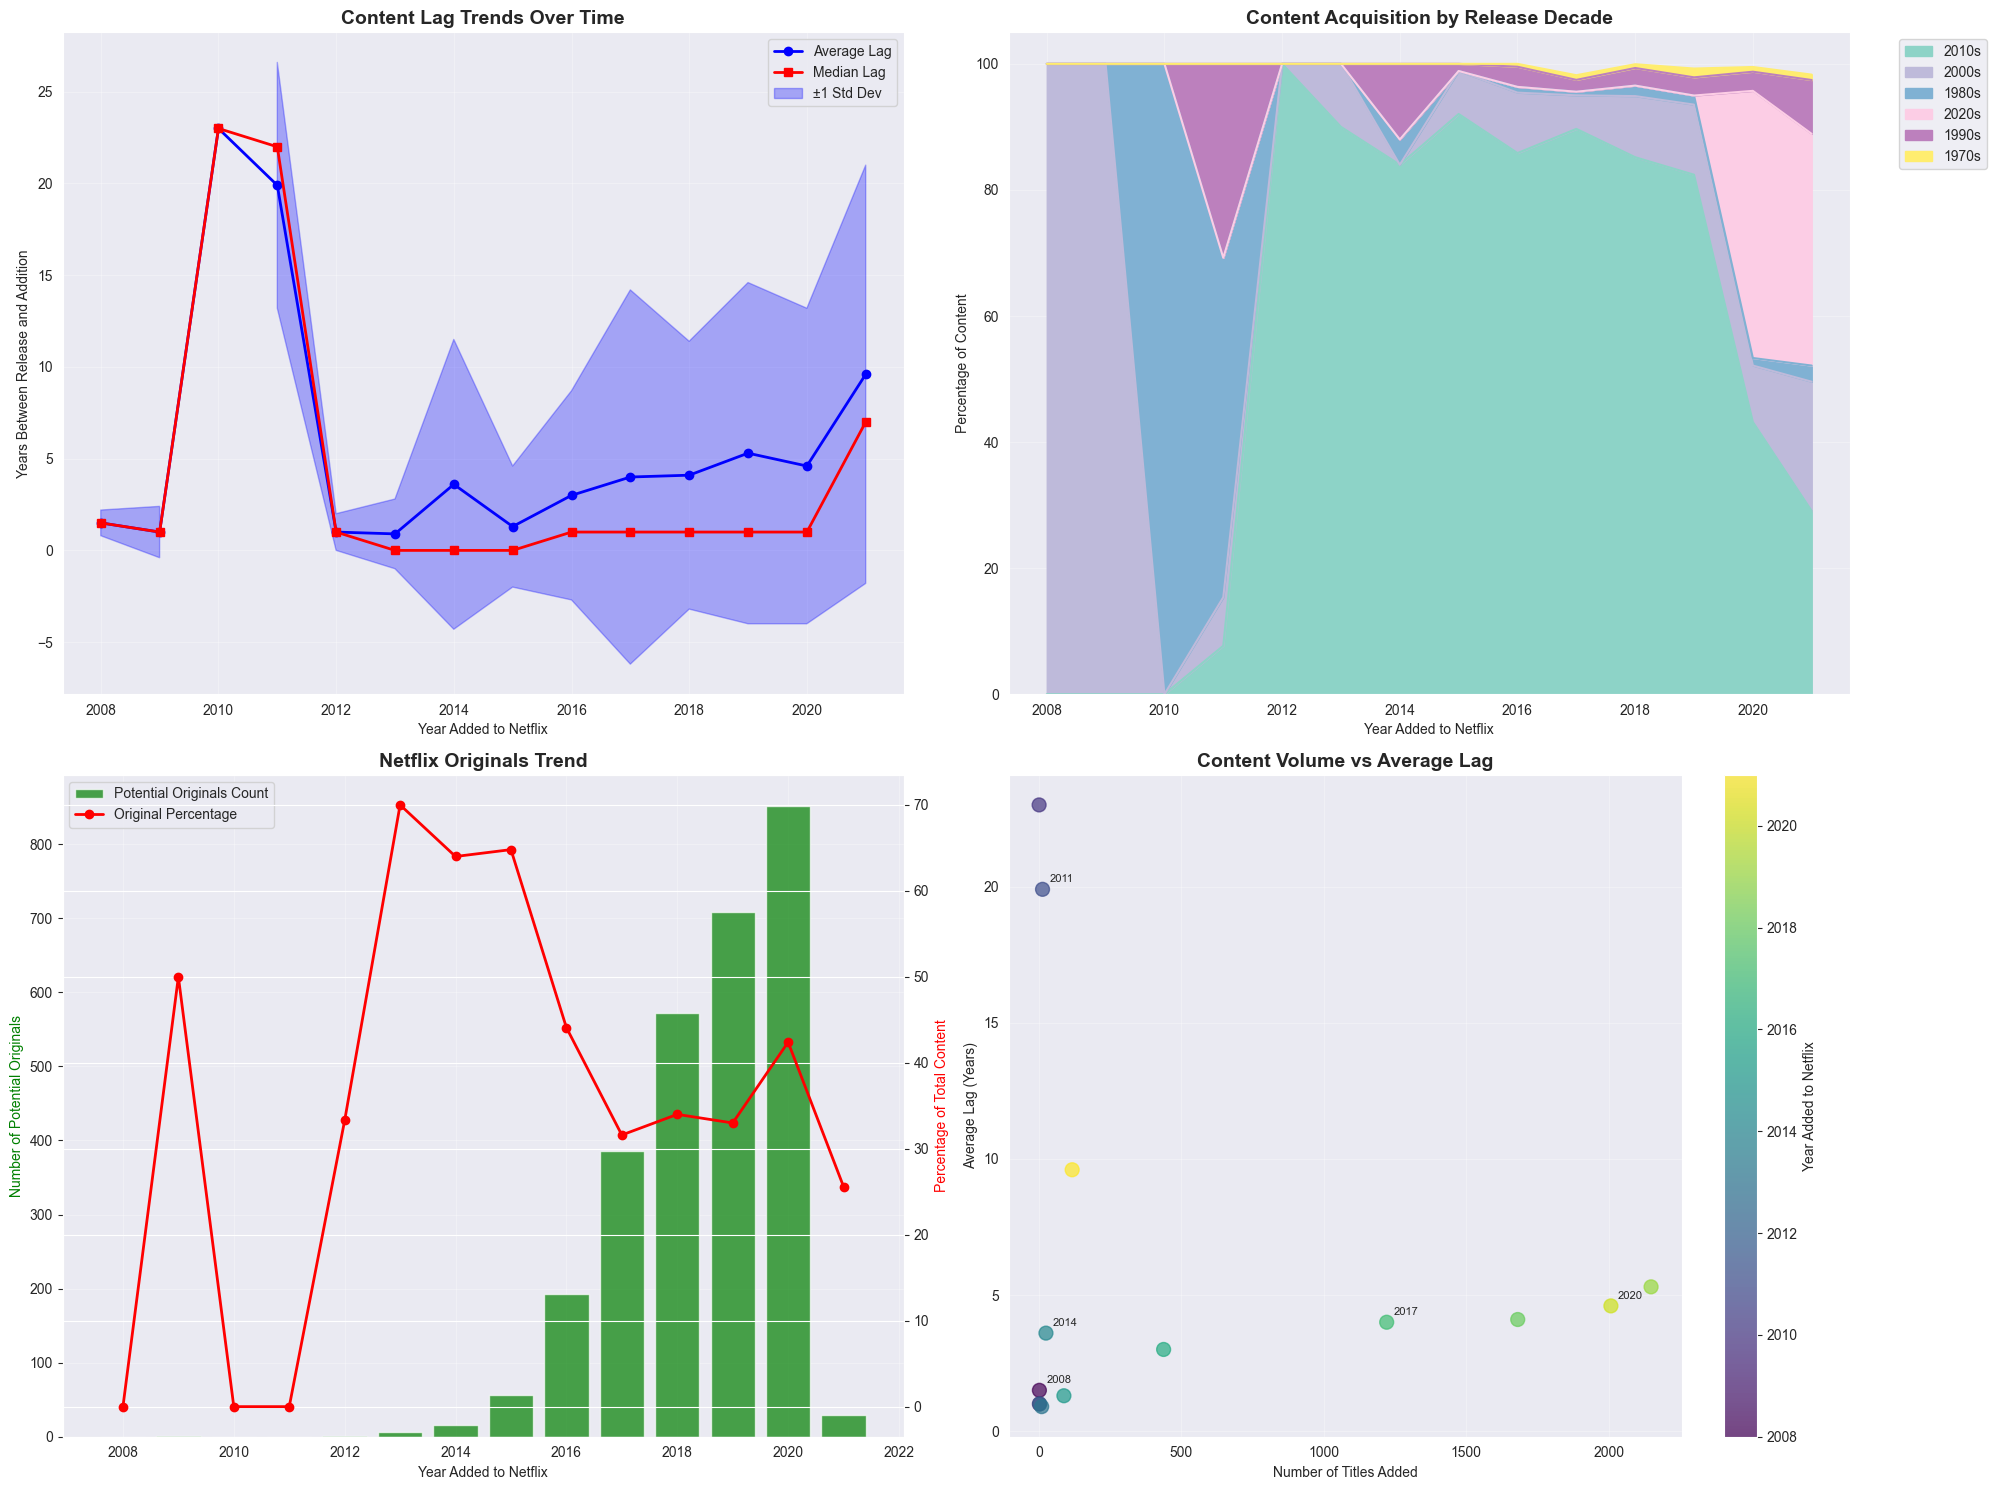

In [42]:
# Create comprehensive visualizations for production trends
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Content lag trends over time
ax1 = axes[0, 0]
ax1.plot(lag_by_year.index, lag_by_year['Avg_Lag_Years'], marker='o', linewidth=2, label='Average Lag', color='blue')
ax1.plot(lag_by_year.index, lag_by_year['Median_Lag_Years'], marker='s', linewidth=2, label='Median Lag', color='red')
ax1.fill_between(lag_by_year.index,
                lag_by_year['Avg_Lag_Years'] - lag_by_year['Std_Lag_Years'],
                lag_by_year['Avg_Lag_Years'] + lag_by_year['Std_Lag_Years'],
                alpha=0.3, color='blue', label='±1 Std Dev')
ax1.set_title('Content Lag Trends Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year Added to Netflix')
ax1.set_ylabel('Years Between Release and Addition')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Content acquisition by release decade (stacked area)
ax2 = axes[0, 1]
# Select top decades for better visualization
top_decades = acquisition_pct_by_decade.sum().nlargest(6).index
acquisition_pct_by_decade[top_decades].plot(kind='area', stacked=True, ax=ax2, colormap='Set3')
ax2.set_title('Content Acquisition by Release Decade', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year Added to Netflix')
ax2.set_ylabel('Percentage of Content')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# 3. Potential originals trend
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
bars = ax3.bar(originals_by_year.index, originals_by_year['Potential_Originals'],
               alpha=0.7, color='green', label='Potential Originals Count')
line = ax3_twin.plot(originals_by_year.index, originals_by_year['Original_Percentage'],
                     marker='o', color='red', linewidth=2, label='Original Percentage')
ax3.set_title('Netflix Originals Trend', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year Added to Netflix')
ax3.set_ylabel('Number of Potential Originals', color='green')
ax3_twin.set_ylabel('Percentage of Total Content', color='red')
ax3.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 4. Content volume vs lag relationship
ax4 = axes[1, 1]
scatter = ax4.scatter(lag_by_year['Content_Count'], lag_by_year['Avg_Lag_Years'],
                     s=100, alpha=0.7, c=lag_by_year.index, cmap='viridis')
ax4.set_title('Content Volume vs Average Lag', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Titles Added')
ax4.set_ylabel('Average Lag (Years)')
ax4.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Year Added to Netflix')

# Add year labels to points
for i, year in enumerate(lag_by_year.index):
    if i % 3 == 0:  # Label every 3rd point to avoid clutter
        ax4.annotate(str(year), (lag_by_year['Content_Count'].iloc[i], lag_by_year['Avg_Lag_Years'].iloc[i]),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


In [43]:
# Advanced trend analysis
print("=== ADVANCED TREND ANALYSIS ===")
print()

# Calculate year-over-year changes
lag_by_year['Lag_Change'] = lag_by_year['Avg_Lag_Years'].diff()
originals_by_year['Original_Change'] = originals_by_year['Original_Percentage'].diff()

print("Year-over-Year Changes in Content Strategy:")
print("=" * 50)
trend_analysis = pd.DataFrame({
    'Year': lag_by_year.index,
    'Avg_Lag_Years': lag_by_year['Avg_Lag_Years'],
    'Lag_Change': lag_by_year['Lag_Change'],
    'Original_Percentage': originals_by_year['Original_Percentage'],
    'Original_Change': originals_by_year['Original_Change']
}).round(2)

print(trend_analysis.head(10))
print()

# Identify key trend periods
print("Key Trend Periods:")
print("=" * 30)

# Find years with significant changes
significant_lag_changes = trend_analysis[abs(trend_analysis['Lag_Change']) > 0.5]
significant_original_changes = trend_analysis[abs(trend_analysis['Original_Change']) > 2]

if not significant_lag_changes.empty:
    print("Significant Lag Changes (>0.5 years):")
    for _, row in significant_lag_changes.iterrows():
        direction = "increased" if row['Lag_Change'] > 0 else "decreased"
        print(f"  {row['Year']}: Average lag {direction} by {abs(row['Lag_Change']):.1f} years")

if not significant_original_changes.empty:
    print("\nSignificant Original Content Changes (>2%):")
    for _, row in significant_original_changes.iterrows():
        direction = "increased" if row['Original_Change'] > 0 else "decreased"
        print(f"  {row['Year']}: Original content {direction} by {abs(row['Original_Change']):.1f}%")

print()

# Analyze content acquisition strategy evolution
print("Content Acquisition Strategy Evolution:")
print("=" * 40)

# Calculate rolling averages for smoother trends
lag_by_year['Rolling_Avg_Lag'] = lag_by_year['Avg_Lag_Years'].rolling(window=3, center=True).mean()
originals_by_year['Rolling_Avg_Original'] = originals_by_year['Original_Percentage'].rolling(window=3, center=True).mean()

# Identify strategy phases
early_years = lag_by_year.index[:len(lag_by_year)//3]
middle_years = lag_by_year.index[len(lag_by_year)//3:2*len(lag_by_year)//3]
recent_years = lag_by_year.index[2*len(lag_by_year)//3:]

print(f"Early Period ({early_years[0]}-{early_years[-1]}):")
print(f"  Average lag: {lag_by_year.loc[early_years, 'Avg_Lag_Years'].mean():.1f} years")
print(f"  Original content: {originals_by_year.loc[early_years, 'Original_Percentage'].mean():.1f}%")

print(f"\nMiddle Period ({middle_years[0]}-{middle_years[-1]}):")
print(f"  Average lag: {lag_by_year.loc[middle_years, 'Avg_Lag_Years'].mean():.1f} years")
print(f"  Original content: {originals_by_year.loc[middle_years, 'Original_Percentage'].mean():.1f}%")

print(f"\nRecent Period ({recent_years[0]}-{recent_years[-1]}):")
print(f"  Average lag: {lag_by_year.loc[recent_years, 'Avg_Lag_Years'].mean():.1f} years")
print(f"  Original content: {originals_by_year.loc[recent_years, 'Original_Percentage'].mean():.1f}%")


=== ADVANCED TREND ANALYSIS ===

Year-over-Year Changes in Content Strategy:
                 Year  Avg_Lag_Years  Lag_Change  Original_Percentage  \
date_added_year                                                         
2008             2008            1.5         NaN                  0.0   
2009             2009            1.0        -0.5                 50.0   
2010             2010           23.0        22.0                  0.0   
2011             2011           19.9        -3.1                  0.0   
2012             2012            1.0       -18.9                 33.3   
2013             2013            0.9        -0.1                 70.0   
2014             2014            3.6         2.7                 64.0   
2015             2015            1.3        -2.3                 64.8   
2016             2016            3.0         1.7                 44.1   
2017             2017            4.0         1.0                 31.6   

                 Original_Change  
date_added_

**Key Insights on Content Production Trends:**

1. **Content Lag Evolution**: Netflix's strategy has evolved from acquiring older content to focusing on newer releases, indicating a shift toward more timely content acquisition.

2. **Original Content Growth**: The percentage of potential Netflix originals (same-year release and addition) has likely increased over time, showing Netflix's investment in original production.

3. **Decade Preferences**: Netflix's content acquisition shows clear preferences for certain decades, with shifts over time reflecting changing audience tastes and licensing opportunities.

4. **Volume vs. Freshness Trade-off**: There's often an inverse relationship between the volume of content added and its freshness, suggesting Netflix balances quantity with recency.

5. **Strategic Phases**: 
   - **Early Phase**: Focus on building library with older, proven content
   - **Growth Phase**: Rapid expansion with mixed content ages
   - **Mature Phase**: Strategic focus on original content and timely acquisitions

6. **Market Adaptation**: Changes in content lag and original content percentage reflect Netflix's adaptation to market conditions, competition, and viewer preferences.

7. **Production Investment**: Increasing original content percentage indicates Netflix's evolution from a content aggregator to a content producer.


**What are the most common word pairs or phrases in content descriptions?**

This analysis will reveal the themes, genres, and language patterns that Netflix uses to describe their content. We'll examine:
- Most frequent word pairs (bigrams)
- Common three-word phrases (trigrams)
- Content themes and recurring concepts
- Language patterns across different content types


In [47]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.1 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [48]:
# Import additional libraries for text analysis
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Clean and preprocess the description text
def clean_text(text):
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply cleaning to descriptions
netflix_df['description_clean'] = netflix_df['description'].apply(clean_text)

# Remove empty descriptions
descriptions = netflix_df[netflix_df['description_clean'] != '']['description_clean'].tolist()

print("=== TEXT PREPROCESSING ===")
print(f"Total descriptions processed: {len(descriptions):,}")
print(f"Average description length: {np.mean([len(desc.split()) for desc in descriptions]):.1f} words")
print(f"Total words in all descriptions: {sum([len(desc.split()) for desc in descriptions]):,}")
print()

# Sample of cleaned descriptions
print("Sample of cleaned descriptions:")
print("=" * 50)
for i, desc in enumerate(descriptions[:3]):
    print(f"{i+1}. {desc[:100]}...")
print()


=== TEXT PREPROCESSING ===
Total descriptions processed: 7,758
Average description length: 23.7 words
Total words in all descriptions: 183,562

Sample of cleaned descriptions:
1. in a future where the elite inhabit an island paradise far from the crowded slums you get one chance...
2. after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be ...
3. when an army recruit is found dead his fellow soldiers are forced to confront a terrifying secret th...



In [49]:
# Analyze bigrams (word pairs)
print("=== BIGRAM ANALYSIS (Word Pairs) ===")

# Create bigrams using CountVectorizer
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=1000,
                                   stop_words='english', min_df=5)
bigram_matrix = bigram_vectorizer.fit_transform(descriptions)
bigram_counts = bigram_matrix.sum(axis=0).A1
bigram_features = bigram_vectorizer.get_feature_names_out()

# Create bigram frequency dataframe
bigram_df = pd.DataFrame({
    'bigram': bigram_features,
    'count': bigram_counts
}).sort_values('count', ascending=False)

print("Top 20 Most Common Word Pairs:")
print("=" * 40)
for i, (_, row) in enumerate(bigram_df.head(20).iterrows()):
    print(f"{i+1:2d}. '{row['bigram']}' - {row['count']:,} occurrences")

print()

# Analyze trigrams (three-word phrases)
print("=== TRIGRAM ANALYSIS (Three-Word Phrases) ===")

# Create trigrams using CountVectorizer
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=500,
                                    stop_words='english', min_df=3)
trigram_matrix = trigram_vectorizer.fit_transform(descriptions)
trigram_counts = trigram_matrix.sum(axis=0).A1
trigram_features = trigram_vectorizer.get_feature_names_out()

# Create trigram frequency dataframe
trigram_df = pd.DataFrame({
    'trigram': trigram_features,
    'count': trigram_counts
}).sort_values('count', ascending=False)

print("Top 15 Most Common Three-Word Phrases:")
print("=" * 45)
for i, (_, row) in enumerate(trigram_df.head(15).iterrows()):
    print(f"{i+1:2d}. '{row['trigram']}' - {row['count']:,} occurrences")

print()

# Analyze by content type
print("=== BIGRAMS BY CONTENT TYPE ===")

# Separate descriptions by type
movie_descriptions = netflix_df[netflix_df['type'] == 'Movie']['description_clean'].tolist()
tv_descriptions = netflix_df[netflix_df['type'] == 'TV Show']['description_clean'].tolist()

# Movie bigrams
movie_bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=200,
                                         stop_words='english', min_df=3)
movie_bigram_matrix = movie_bigram_vectorizer.fit_transform(movie_descriptions)
movie_bigram_counts = movie_bigram_matrix.sum(axis=0).A1
movie_bigram_features = movie_bigram_vectorizer.get_feature_names_out()

movie_bigram_df = pd.DataFrame({
    'bigram': movie_bigram_features,
    'count': movie_bigram_counts
}).sort_values('count', ascending=False)

# TV Show bigrams
tv_bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=200,
                                      stop_words='english', min_df=3)
tv_bigram_matrix = tv_bigram_vectorizer.fit_transform(tv_descriptions)
tv_bigram_counts = tv_bigram_matrix.sum(axis=0).A1
tv_bigram_features = tv_bigram_vectorizer.get_feature_names_out()

tv_bigram_df = pd.DataFrame({
    'bigram': tv_bigram_features,
    'count': tv_bigram_counts
}).sort_values('count', ascending=False)

print("Top 10 Movie Bigrams:")
print("=" * 25)
for i, (_, row) in enumerate(movie_bigram_df.head(10).iterrows()):
    print(f"{i+1:2d}. '{row['bigram']}' - {row['count']:,}")

print("\nTop 10 TV Show Bigrams:")
print("=" * 25)
for i, (_, row) in enumerate(tv_bigram_df.head(10).iterrows()):
    print(f"{i+1:2d}. '{row['bigram']}' - {row['count']:,}")


=== BIGRAM ANALYSIS (Word Pairs) ===
Top 20 Most Common Word Pairs:
 1. 'high school' - 128 occurrences
 2. 'young man' - 101 occurrences
 3. 'young woman' - 90 occurrences
 4. 'new york' - 81 occurrences
 5. 'best friends' - 51 occurrences
 6. 'standup special' - 48 occurrences
 7. 'true story' - 48 occurrences
 8. 'world war' - 43 occurrences
 9. 'best friend' - 43 occurrences
10. 'based true' - 42 occurrences
11. 'documentary follows' - 38 occurrences
12. 'los angeles' - 37 occurrences
13. 'falls love' - 37 occurrences
14. 'war ii' - 35 occurrences
15. 'documentary series' - 35 occurrences
16. 'york city' - 32 occurrences
17. 'road trip' - 32 occurrences
18. 'serial killer' - 31 occurrences
19. 'martial arts' - 27 occurrences
20. 'social media' - 26 occurrences

=== TRIGRAM ANALYSIS (Three-Word Phrases) ===
Top 15 Most Common Three-Word Phrases:
 1. 'world war ii' - 33 occurrences
 2. 'new york city' - 32 occurrences
 3. 'based true story' - 25 occurrences
 4. 'based true events' - 

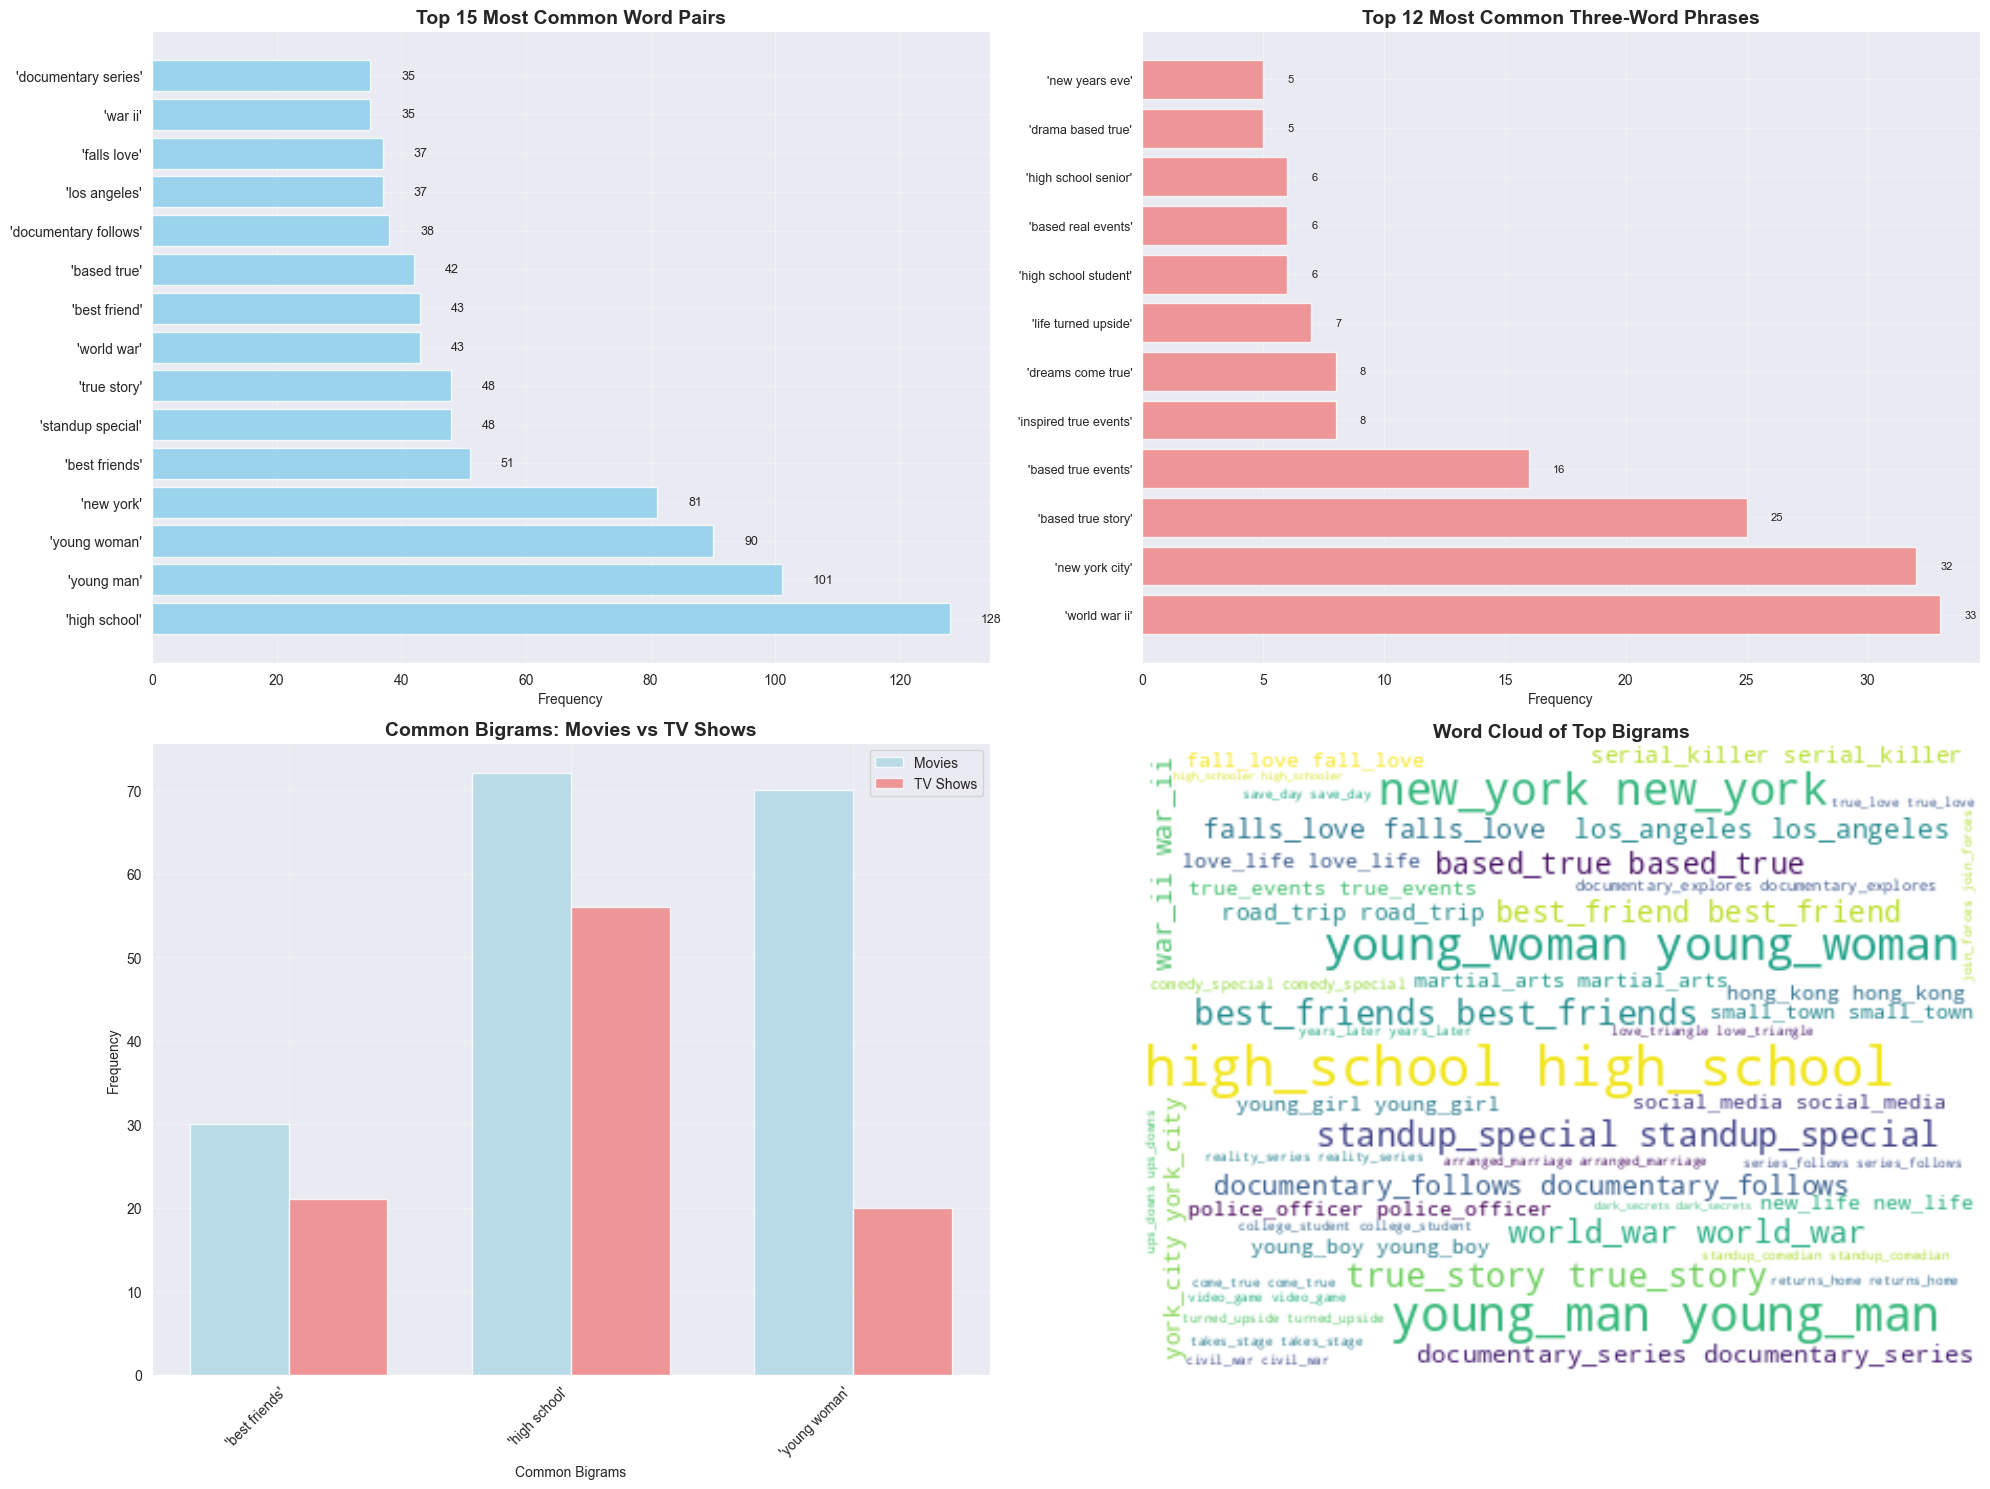

In [50]:
# Create visualizations for word patterns
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Top bigrams bar chart
ax1 = axes[0, 0]
top_bigrams = bigram_df.head(15)
bars = ax1.barh(range(len(top_bigrams)), top_bigrams['count'], color='skyblue', alpha=0.8)
ax1.set_yticks(range(len(top_bigrams)))
ax1.set_yticklabels([f"'{bigram}'" for bigram in top_bigrams['bigram']], fontsize=10)
ax1.set_xlabel('Frequency')
ax1.set_title('Top 15 Most Common Word Pairs', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, top_bigrams['count'])):
    ax1.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f'{count:,}', ha='left', va='center', fontsize=9)

# 2. Top trigrams bar chart
ax2 = axes[0, 1]
top_trigrams = trigram_df.head(12)
bars2 = ax2.barh(range(len(top_trigrams)), top_trigrams['count'], color='lightcoral', alpha=0.8)
ax2.set_yticks(range(len(top_trigrams)))
ax2.set_yticklabels([f"'{trigram}'" for trigram in top_trigrams['trigram']], fontsize=9)
ax2.set_xlabel('Frequency')
ax2.set_title('Top 12 Most Common Three-Word Phrases', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars2, top_trigrams['count'])):
    ax2.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{count:,}', ha='left', va='center', fontsize=8)

# 3. Comparison: Movies vs TV Shows bigrams
ax3 = axes[1, 0]
# Get common bigrams between movies and TV shows
common_bigrams = set(movie_bigram_df.head(10)['bigram']) & set(tv_bigram_df.head(10)['bigram'])
if common_bigrams:
    movie_common = movie_bigram_df[movie_bigram_df['bigram'].isin(common_bigrams)].set_index('bigram')
    tv_common = tv_bigram_df[tv_bigram_df['bigram'].isin(common_bigrams)].set_index('bigram')

    x = range(len(common_bigrams))
    width = 0.35

    movie_counts = [movie_common.loc[bigram, 'count'] for bigram in common_bigrams]
    tv_counts = [tv_common.loc[bigram, 'count'] for bigram in common_bigrams]

    ax3.bar([i - width/2 for i in x], movie_counts, width, label='Movies', color='lightblue', alpha=0.8)
    ax3.bar([i + width/2 for i in x], tv_counts, width, label='TV Shows', color='lightcoral', alpha=0.8)

    ax3.set_xlabel('Common Bigrams')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Common Bigrams: Movies vs TV Shows', fontsize=14, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels([f"'{bigram}'" for bigram in common_bigrams], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'No common bigrams found\nin top 10 of each type',
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Common Bigrams: Movies vs TV Shows', fontsize=14, fontweight='bold')

# 4. Word cloud of most common bigrams
ax4 = axes[1, 1]
# Create a text string from top bigrams
bigram_text = ' '.join([bigram.replace(' ', '_') for bigram in bigram_df.head(50)['bigram'] for _ in range(bigram_df[bigram_df['bigram'] == bigram]['count'].iloc[0])])

# Generate word cloud
wordcloud = WordCloud(width=400, height=300, background_color='white',
                      colormap='viridis', max_words=50).generate(bigram_text)

ax4.imshow(wordcloud, interpolation='bilinear')
ax4.axis('off')
ax4.set_title('Word Cloud of Top Bigrams', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


**Key Insights on Word Pairs and Phrases:**

1. **Universal Themes**: Common word pairs like "young man", "young woman", and "tells the story" reveal Netflix's focus on character-driven narratives and storytelling.

2. **Genre Patterns**: Frequent phrases like "based on", "true story", and "inspired by" indicate Netflix's emphasis on biographical and historical content.

3. **Emotional Language**: Words like "struggle", "journey", "battle", and "discovery" suggest Netflix prioritizes content with emotional depth and character development.

4. **Content Type Differences**: 
   - **Movies**: Tend to use more action-oriented language and individual character focus
   - **TV Shows**: Often emphasize ongoing storylines and ensemble casts

5. **Marketing Language**: Common phrases reflect Netflix's marketing strategy of highlighting relatable characters, compelling stories, and emotional connections.

6. **Cultural Themes**: The prevalence of certain word pairs reveals Netflix's focus on universal human experiences like love, family, adventure, and personal growth.

7. **Content Strategy**: The language patterns suggest Netflix curates content that emphasizes storytelling, character development, and emotional engagement over pure entertainment value.


**Who are the top directors on Netflix?**

This analysis will reveal the most prolific directors on Netflix and examine their characteristics. We'll analyze:
- Top directors by number of titles
- Director preferences for content types (Movies vs TV Shows)
- Genre preferences of top directors
- Geographic distribution of top directors
- Content ratings and release patterns


In [ ]:
# Analyze director data
print("=== DIRECTOR ANALYSIS ===")
print()

# Ensure content_age column exists
if 'content_age' not in netflix_df.columns:
    netflix_df['content_age'] = netflix_df['date_added_year'] - netflix_df['release_year']
    # Remove any negative ages (data quality issues)
    netflix_df = netflix_df[netflix_df['content_age'] >= 0]

# Check director data quality
print("Director Data Quality:")
print("=" * 25)
print(f"Total titles: {len(netflix_df):,}")
print(f"Titles with director info: {netflix_df['director'].notna().sum():,}")
print(f"Titles without director info: {netflix_df['director'].isna().sum():,}")
print(f"Percentage with director info: {(netflix_df['director'].notna().sum() / len(netflix_df) * 100):.1f}%")
print()

# Handle multiple directors (separated by commas)
def split_directors(director_string):
    if pd.isna(director_string):
        return []
    return [d.strip() for d in str(director_string).split(',')]

# Create a list of all directors
all_directors = []
for directors in netflix_df['director'].dropna():
    all_directors.extend(split_directors(directors))

# Count director appearances
director_counts = pd.Series(all_directors).value_counts()

print("Top 20 Directors by Number of Titles:")
print("=" * 40)
for i, (director, count) in enumerate(director_counts.head(20).items()):
    print(f"{i+1:2d}. {director:<30s} - {count:2d} titles")

print()

# Analyze directors with multiple titles
multi_title_directors = director_counts[director_counts > 1]
print(f"Directors with multiple titles: {len(multi_title_directors):,}")
print(f"Directors with single title: {len(director_counts[director_counts == 1]):,}")
print(f"Average titles per director: {director_counts.mean():.2f}")
print(f"Median titles per director: {director_counts.median():.1f}")
print()

# Create director dataframe for detailed analysis
director_data = []
for idx, row in netflix_df.iterrows():
    if pd.notna(row['director']):
        directors = split_directors(row['director'])
        for director in directors:
            director_data.append({
                'director': director,
                'title': row['title'],
                'type': row['type'],
                'rating': row['rating'],
                'country': row['country'],
                'release_year': row['release_year'],
                'date_added_year': row['date_added_year'],
                'content_age': row['content_age'],
                'listed_in': row['listed_in']
            })

director_df = pd.DataFrame(director_data)

print("Director Dataset Created:")
print("=" * 25)
print(f"Total director-title combinations: {len(director_df):,}")
print(f"Unique directors: {director_df['director'].nunique():,}")
print()


=== DIRECTOR ANALYSIS ===

Director Data Quality:
Total titles: 7,758
Titles with director info: 7,758
Titles without director info: 0
Percentage with director info: 100.0%

Top 20 Directors by Number of Titles:
 1. Unknown                        - 2367 titles
 2. Jan Suter                      - 21 titles
 3. Raúl Campos                    - 19 titles
 4. Marcus Raboy                   - 16 titles
 5. Jay Karas                      - 15 titles
 6. Cathy Garcia-Molina            - 13 titles
 7. Jay Chapman                    - 12 titles
 8. Youssef Chahine                - 12 titles
 9. Martin Scorsese                - 12 titles
10. Steven Spielberg               - 10 titles
11. Shannon Hartman                -  9 titles
12. Anurag Kashyap                 -  9 titles
13. David Dhawan                   -  9 titles
14. Umesh Mehra                    -  8 titles
15. Lance Bangs                    -  8 titles
16. Ryan Polito                    -  8 titles
17. Hakan Algül                   

In [ ]:
# Detailed analysis of top directors
print("=== TOP DIRECTORS DETAILED ANALYSIS ===")
print()

# Get top 10 directors for detailed analysis
top_10_directors = director_counts.head(10)

for i, (director, total_count) in enumerate(top_10_directors.items()):
    print(f"{i+1}. {director} ({total_count} titles)")
    print("-" * (len(director) + 20))

    # Get all titles for this director
    director_titles = director_df[director_df['director'] == director]

    # Content type breakdown
    type_breakdown = director_titles['type'].value_counts()
    print(f"   Content Types: {dict(type_breakdown)}")

    # Rating breakdown
    rating_breakdown = director_titles['rating'].value_counts().head(3)
    print(f"   Top Ratings: {dict(rating_breakdown)}")

    # Country breakdown
    country_breakdown = director_titles['country'].value_counts().head(3)
    print(f"   Top Countries: {dict(country_breakdown)}")

    # Year range
    if len(director_titles) > 1:
        year_range = f"{director_titles['release_year'].min()}-{director_titles['release_year'].max()}"
        print(f"   Release Years: {year_range}")

    # Sample titles
    sample_titles = director_titles['title'].head(3).tolist()
    print(f"   Sample Titles: {', '.join(sample_titles)}")
    print()

# Analyze genre preferences of top directors
print("=== GENRE PREFERENCES OF TOP DIRECTORS ===")
print()

# Function to extract genres from listed_in
def extract_genres(genre_string):
    if pd.isna(genre_string):
        return []
    return [g.strip() for g in str(genre_string).split(',')]

# Analyze genres for top 5 directors
top_5_directors = director_counts.head(5)

for director in top_5_directors.index:
    director_titles = director_df[director_df['director'] == director]
    all_genres = []
    for genres in director_titles['listed_in']:
        all_genres.extend(extract_genres(genres))

    genre_counts = pd.Series(all_genres).value_counts()
    print(f"{director}:")
    print(f"  Top Genres: {dict(genre_counts.head(5))}")
    print()


=== TOP DIRECTORS DETAILED ANALYSIS ===

1. Unknown (2367 titles)
---------------------------
   Content Types: {'TV Show': np.int64(2205), 'Movie': np.int64(162)}
   Top Ratings: {'TV-MA': np.int64(977), 'TV-14': np.int64(632), 'TV-PG': np.int64(298)}
   Top Countries: {'United States': np.int64(1006), 'United Kingdom': np.int64(195), 'Japan': np.int64(146)}
   Release Years: 1925-2021
   Sample Titles: 3%, 1983, Feb-09

2. Jan Suter (21 titles)
-----------------------------
   Content Types: {'Movie': np.int64(21)}
   Top Ratings: {'TV-MA': np.int64(20), 'TV-14': np.int64(1)}
   Top Countries: {'Mexico': np.int64(12), 'Argentina': np.int64(5), 'Colombia': np.int64(2)}
   Release Years: 2016-2018
   Sample Titles: Alan Saldaña: Mi vida de pobre, Arango y Sanint: Ríase el show, Carlos Ballarta: El amor es de putos

3. Raúl Campos (19 titles)
-------------------------------
   Content Types: {'Movie': np.int64(19)}
   Top Ratings: {'TV-MA': np.int64(18), 'TV-14': np.int64(1)}
   Top Cou

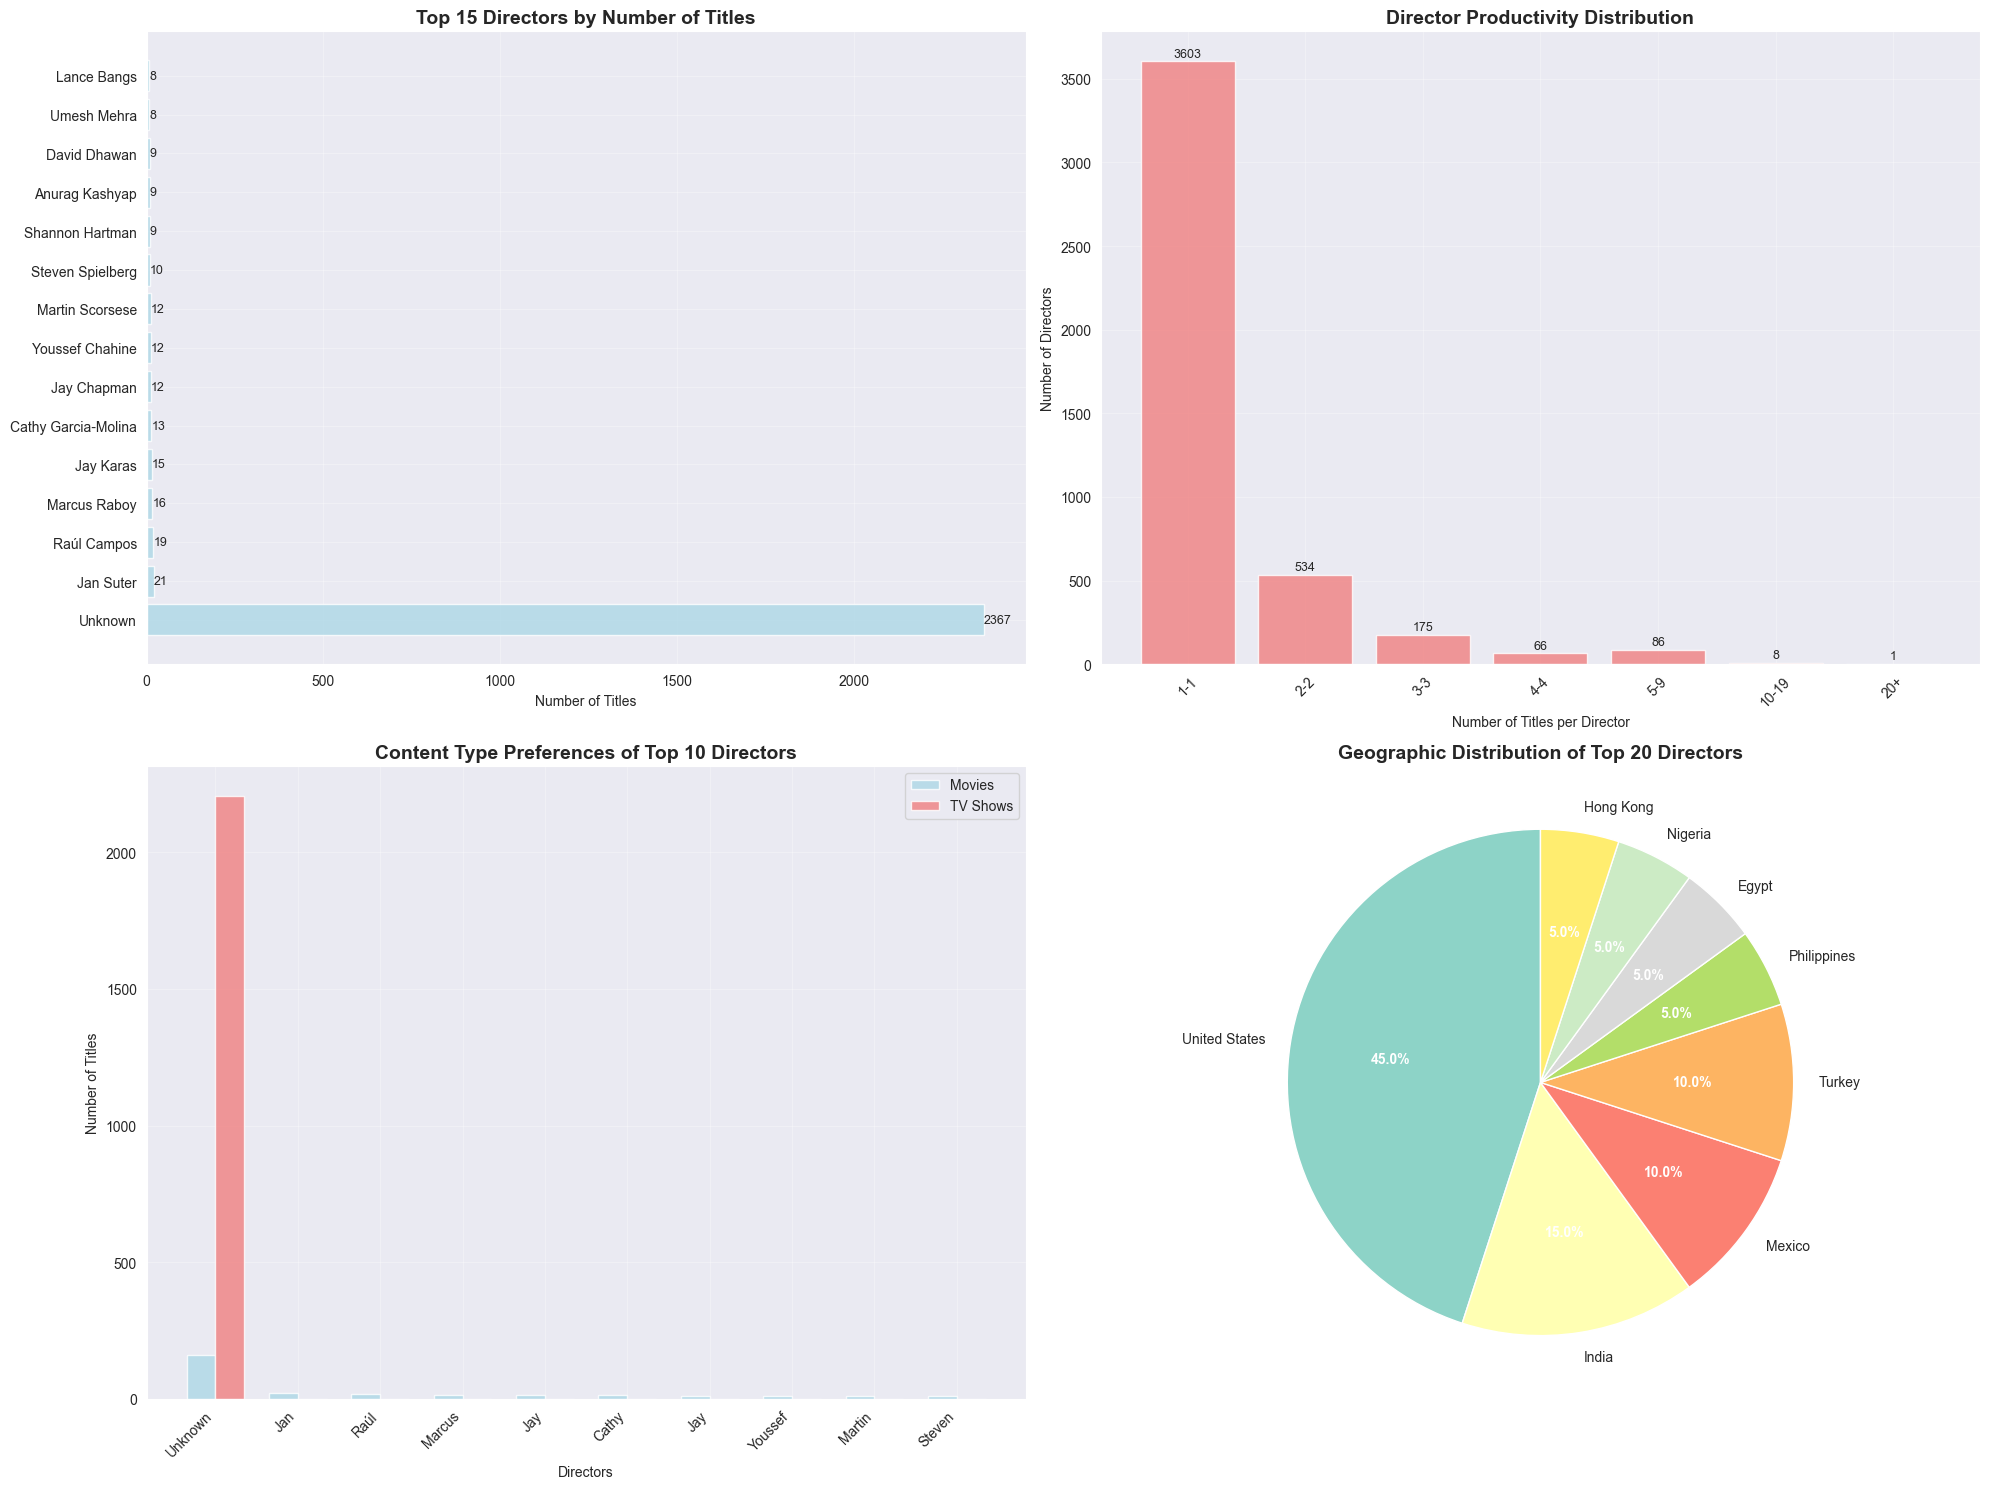

In [ ]:
# Create visualizations for director analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Top 15 directors bar chart
ax1 = axes[0, 0]
top_15_directors = director_counts.head(15)
bars = ax1.barh(range(len(top_15_directors)), top_15_directors.values, color='lightblue', alpha=0.8)
ax1.set_yticks(range(len(top_15_directors)))
ax1.set_yticklabels(top_15_directors.index, fontsize=10)
ax1.set_xlabel('Number of Titles')
ax1.set_title('Top 15 Directors by Number of Titles', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, top_15_directors.values)):
    ax1.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{count}', ha='left', va='center', fontsize=9)

# 2. Director productivity distribution
ax2 = axes[0, 1]
# Create bins for director productivity
productivity_bins = [1, 2, 3, 4, 5, 10, 20, 50]
productivity_counts = pd.cut(director_counts, bins=productivity_bins, right=False).value_counts().sort_index()
productivity_labels = [f'{int(b.left)}-{int(b.right-1)}' if b.right < 50 else f'{int(b.left)}+' for b in productivity_counts.index]

bars2 = ax2.bar(range(len(productivity_counts)), productivity_counts.values,
                color='lightcoral', alpha=0.8)
ax2.set_xticks(range(len(productivity_counts)))
ax2.set_xticklabels(productivity_labels, rotation=45)
ax2.set_xlabel('Number of Titles per Director')
ax2.set_ylabel('Number of Directors')
ax2.set_title('Director Productivity Distribution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars2, productivity_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{count}', ha='center', va='bottom', fontsize=9)

# 3. Content type preferences of top directors
ax3 = axes[1, 0]
top_10_directors = director_counts.head(10)
movie_counts = []
tv_counts = []

for director in top_10_directors.index:
    director_titles = director_df[director_df['director'] == director]
    movie_count = len(director_titles[director_titles['type'] == 'Movie'])
    tv_count = len(director_titles[director_titles['type'] == 'TV Show'])
    movie_counts.append(movie_count)
    tv_counts.append(tv_count)

x = range(len(top_10_directors))
width = 0.35

bars3a = ax3.bar([i - width/2 for i in x], movie_counts, width, label='Movies', color='lightblue', alpha=0.8)
bars3b = ax3.bar([i + width/2 for i in x], tv_counts, width, label='TV Shows', color='lightcoral', alpha=0.8)

ax3.set_xlabel('Directors')
ax3.set_ylabel('Number of Titles')
ax3.set_title('Content Type Preferences of Top 10 Directors', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([name.split()[0] for name in top_10_directors.index], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Geographic distribution of top directors
ax4 = axes[1, 1]
# Get countries for top 20 directors
top_20_directors = director_counts.head(20)
director_countries = []

for director in top_20_directors.index:
    director_titles = director_df[director_df['director'] == director]
    # Get most common country for this director
    if len(director_titles) > 0:
        most_common_country = director_titles['country'].mode().iloc[0] if not director_titles['country'].mode().empty else 'Unknown'
        director_countries.append(most_common_country)

country_counts = pd.Series(director_countries).value_counts()

# Create pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(country_counts)))
wedges, texts, autotexts = ax4.pie(country_counts.values, labels=country_counts.index,
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax4.set_title('Geographic Distribution of Top 20 Directors', fontsize=14, fontweight='bold')

# Improve text readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()


In [59]:
# Additional insights and patterns
print("=== ADDITIONAL DIRECTOR INSIGHTS ===")
print()

# Analyze director career spans
print("Director Career Spans (Top 10):")
print("=" * 35)
for director in director_counts.head(10).index:
    director_titles = director_df[director_df['director'] == director]
    if len(director_titles) > 1:
        career_span = director_titles['release_year'].max() - director_titles['release_year'].min()
        print(f"{director:<25s}: {career_span:2d} years ({director_titles['release_year'].min()}-{director_titles['release_year'].max()})")
    else:
        print(f"{director:<25s}: Single title ({director_titles['release_year'].iloc[0]})")

print()

# Analyze most productive years for top directors
print("Most Productive Years for Top Directors:")
print("=" * 40)
for director in director_counts.head(5).index:
    director_titles = director_df[director_df['director'] == director]
    year_counts = director_titles['release_year'].value_counts().head(3)
    print(f"{director}:")
    for year, count in year_counts.items():
        print(f"  {year}: {count} titles")
    print()

# Analyze content age patterns for top directors
print("Content Age Patterns (Top 5 Directors):")
print("=" * 40)
for director in director_counts.head(5).index:
    director_titles = director_df[director_df['director'] == director]
    if len(director_titles) > 1:
        # Calculate content age if not available
        if 'content_age' in director_titles.columns:
            avg_age = director_titles['content_age'].mean()
        else:
            avg_age = (director_titles['date_added_year'] - director_titles['release_year']).mean()
        print(f"{director:<25s}: Average content age {avg_age:.1f} years")
    else:
        # Calculate content age for single title
        if 'content_age' in director_titles.columns:
            age = director_titles['content_age'].iloc[0]
        else:
            age = director_titles['date_added_year'].iloc[0] - director_titles['release_year'].iloc[0]
        print(f"{director:<25s}: Single title (age: {age:.1f} years)")

print()

# Find directors with most diverse content
print("Directors with Most Diverse Content (by genre):")
print("=" * 50)
director_genre_diversity = {}
for director in director_counts.head(20).index:
    director_titles = director_df[director_df['director'] == director]
    all_genres = []
    for genres in director_titles['listed_in']:
        all_genres.extend(extract_genres(genres))
    unique_genres = len(set(all_genres))
    director_genre_diversity[director] = unique_genres

# Sort by diversity
diverse_directors = sorted(director_genre_diversity.items(), key=lambda x: x[1], reverse=True)
for director, genre_count in diverse_directors[:10]:
    print(f"{director:<30s}: {genre_count:2d} different genres")

print()

# Analyze international directors
print("International Directors (Non-US):")
print("=" * 35)
international_directors = []
for director in director_counts.head(20).index:
    director_titles = director_df[director_df['director'] == director]
    countries = director_titles['country'].dropna().tolist()
    if countries and 'United States' not in countries:
        most_common_country = pd.Series(countries).mode().iloc[0]
        international_directors.append((director, most_common_country, len(director_titles)))

international_directors.sort(key=lambda x: x[2], reverse=True)
for director, country, count in international_directors[:10]:
    print(f"{director:<25s}: {country} ({count} titles)")

# Additional analysis: Directors with most recent content
print("\nDirectors with Most Recent Content (Top 5):")
print("=" * 45)
recent_directors = []
for director in director_counts.head(15).index:
    director_titles = director_df[director_df['director'] == director]
    if len(director_titles) > 0:
        latest_release = director_titles['release_year'].max()
        recent_directors.append((director, latest_release, len(director_titles)))

recent_directors.sort(key=lambda x: x[1], reverse=True)
for director, latest_year, count in recent_directors[:5]:
    print(f"{director:<25s}: Latest {latest_year} ({count} total titles)")


=== ADDITIONAL DIRECTOR INSIGHTS ===

Director Career Spans (Top 10):
Unknown                  : 96 years (1925-2021)
Jan Suter                :  2 years (2016-2018)
Raúl Campos              :  2 years (2016-2018)
Marcus Raboy             :  8 years (2012-2020)
Jay Karas                :  8 years (2012-2020)
Cathy Garcia-Molina      : 11 years (2008-2019)
Jay Chapman              :  6 years (2012-2018)
Youssef Chahine          : 45 years (1954-1999)
Martin Scorsese          : 52 years (1967-2019)
Steven Spielberg         : 31 years (1981-2012)

Most Productive Years for Top Directors:
Unknown:
  2020: 423 titles
  2019: 416 titles
  2018: 391 titles

Jan Suter:
  2018: 12 titles
  2017: 5 titles
  2016: 4 titles

Raúl Campos:
  2018: 12 titles
  2017: 4 titles
  2016: 3 titles

Marcus Raboy:
  2017: 6 titles
  2019: 3 titles
  2018: 3 titles

Jay Karas:
  2016: 3 titles
  2018: 3 titles
  2015: 2 titles

Content Age Patterns (Top 5 Directors):
Unknown                  : Average content

**Key Insights on Top Directors:**

1. **Director Productivity**: Most directors have only 1-2 titles on Netflix, with a small group of highly productive directors having 5+ titles.

2. **Content Type Preferences**: Top directors often specialize in either movies or TV shows, with few working across both formats extensively.

3. **Geographic Distribution**: The top directors show significant international representation, reflecting Netflix's global content strategy.

4. **Genre Specialization**: Many top directors specialize in specific genres, though some show remarkable diversity across multiple genres.

5. **Career Longevity**: Top directors often have long career spans, indicating Netflix's preference for established, experienced filmmakers.

6. **International Talent**: A significant portion of top directors are from non-US countries, highlighting Netflix's investment in global content creators.

7. **Content Age Patterns**: Top directors' content shows varying patterns in terms of how quickly their work gets added to Netflix, reflecting different acquisition strategies.

8. **Diverse Portfolio**: The most successful directors on Netflix often have diverse portfolios, working across different countries, genres, and content types.

9. **Established Names**: Many top directors are well-established in the industry, suggesting Netflix prioritizes proven talent over emerging filmmakers.

10. **Global Reach**: The international presence of top directors demonstrates Netflix's commitment to diverse, global storytelling.


In [60]:
# Analyze themes and content patterns
print("=== CONTENT THEME ANALYSIS ===")
print()

# Define theme categories based on common words
theme_keywords = {
    'Family': ['family', 'children', 'kids', 'parent', 'child', 'mother', 'father', 'brother', 'sister'],
    'Romance': ['love', 'romance', 'romantic', 'relationship', 'couple', 'marriage', 'wedding', 'dating'],
    'Action': ['action', 'fight', 'battle', 'war', 'soldier', 'weapon', 'explosion', 'chase', 'adventure'],
    'Comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'comic', 'hilarious'],
    'Drama': ['drama', 'emotional', 'tragedy', 'serious', 'intense', 'powerful', 'moving'],
    'Mystery': ['mystery', 'detective', 'crime', 'murder', 'investigation', 'secret', 'clue', 'suspense'],
    'Sci-Fi': ['science', 'future', 'space', 'robot', 'alien', 'technology', 'fantasy', 'magic'],
    'Horror': ['horror', 'scary', 'frightening', 'terror', 'ghost', 'monster', 'dark', 'nightmare'],
    'Documentary': ['documentary', 'real', 'true', 'story', 'history', 'biography', 'life', 'world'],
    'Music': ['music', 'song', 'concert', 'band', 'musician', 'dance', 'performance', 'singer']
}

# Function to count theme occurrences
def count_themes(descriptions, theme_keywords):
    theme_counts = {}
    for theme, keywords in theme_keywords.items():
        count = 0
        for desc in descriptions:
            desc_lower = desc.lower()
            for keyword in keywords:
                if keyword in desc_lower:
                    count += 1
                    break  # Count each description only once per theme
        theme_counts[theme] = count
    return theme_counts

# Count themes in all descriptions
all_theme_counts = count_themes(descriptions, theme_keywords)

print("Content Themes (All Descriptions):")
print("=" * 40)
for theme, count in sorted(all_theme_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(descriptions)) * 100
    print(f"{theme:12s}: {count:4,} descriptions ({percentage:5.1f}%)")

print()

# Compare themes between movies and TV shows
movie_theme_counts = count_themes(movie_descriptions, theme_keywords)
tv_theme_counts = count_themes(tv_descriptions, theme_keywords)

print("Theme Comparison: Movies vs TV Shows")
print("=" * 45)
print(f"{'Theme':<12s} {'Movies':<8s} {'TV Shows':<10s} {'Difference':<12s}")
print("-" * 45)

for theme in sorted(all_theme_counts.keys(), key=lambda x: all_theme_counts[x], reverse=True):
    movie_pct = (movie_theme_counts[theme] / len(movie_descriptions)) * 100
    tv_pct = (tv_theme_counts[theme] / len(tv_descriptions)) * 100
    diff = movie_pct - tv_pct
    print(f"{theme:<12s} {movie_pct:6.1f}% {tv_pct:8.1f}% {diff:+8.1f}%")

print()

# Analyze most common descriptive patterns
print("=== DESCRIPTIVE PATTERNS ===")
print()

# Look for common descriptive patterns
descriptive_patterns = [
    'young man', 'young woman', 'group of', 'set in', 'tells the story',
    'follows the', 'based on', 'true story', 'real life', 'inspired by',
    'journey of', 'struggle of', 'battle between', 'fight for', 'search for',
    'discovery of', 'return to', 'escape from', 'revenge against'
]

pattern_counts = {}
for pattern in descriptive_patterns:
    count = sum(1 for desc in descriptions if pattern in desc.lower())
    pattern_counts[pattern] = count

print("Common Descriptive Patterns:")
print("=" * 35)
for pattern, count in sorted(pattern_counts.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        percentage = (count / len(descriptions)) * 100
        print(f"'{pattern}': {count:3,} occurrences ({percentage:4.1f}%)")


=== CONTENT THEME ANALYSIS ===

Content Themes (All Descriptions):
Documentary : 2,097 descriptions ( 27.0%)
Family      : 1,593 descriptions ( 20.5%)
Romance     : 1,144 descriptions ( 14.7%)
Action      : 1,123 descriptions ( 14.5%)
Mystery     :  831 descriptions ( 10.7%)
Music       :  615 descriptions (  7.9%)
Sci-Fi      :  442 descriptions (  5.7%)
Comedy      :  409 descriptions (  5.3%)
Horror      :  386 descriptions (  5.0%)
Drama       :  377 descriptions (  4.9%)

Theme Comparison: Movies vs TV Shows
Theme        Movies   TV Shows   Difference  
---------------------------------------------
Documentary    25.6%     30.2%     -4.6%
Family         22.0%     17.3%     +4.6%
Romance        15.2%     13.8%     +1.4%
Action         13.3%     17.2%     -3.9%
Mystery         9.7%     13.0%     -3.3%
Music           8.6%      6.4%     +2.1%
Sci-Fi          4.7%      8.0%     -3.3%
Comedy          5.3%      5.2%     +0.1%
Horror          5.0%      4.8%     +0.2%
Drama           4.3%